In [1]:
from google.colab import drive

# This will prompt you to click a link and get an authorization code
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split

#Making constant time interval taking average. Taken time interval is 5S

In [28]:
import os
import pandas as pd

# Specify the directory path
directory_path = '/content/gdrive/MyDrive/unprocessed data'

# Get a list of all the filenames in the directory
file_names = os.listdir(directory_path)

# Create a new directory called 'average_data' if it doesn't exist
average_data_directory = '/content/gdrive/MyDrive/average_data_5S'
# if not os.path.exists(average_data_directory):
#     os.makedirs(average_data_directory)

# Define the file name
file_name = 'heart_rate-2021-12-04.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(os.path.join(directory_path, file_name))

# Convert the 'dateTime' column to datetime objects
df['dateTime'] = pd.to_datetime(df['dateTime'])

# Set the 'dateTime' column as the index
df.set_index('dateTime', inplace=True)

# Resample the DataFrame to get the average of data every 10 seconds
average_data_per_10_seconds = df.resample('5S').mean()

# Save the average data to a new CSV file in the 'average_data' directory
new_file_path = os.path.join(average_data_directory, file_name)
average_data_per_10_seconds.to_csv(new_file_path)


#visualizing data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/gdrive/MyDrive/average_data_5S/heart_rate-2021-11-25.csv')
table_titles = df.columns
file_name = 'heart_rate-2021-11-25'
print("Table Titles:")
for title in table_titles:
    print(title)
df.columns = ['dateTime', 'value__bpm','value__confidence']  # Assign column names
df['value__bpm'] = pd.to_numeric(df['value__bpm'], errors='coerce')  # Convert the 'value__bpm' column to numeric values
df.plot(kind='line', x='dateTime', y='value__bpm', title=file_name, figsize=(20, 6))  # Plot the data
plt.show()  # Show the plot



Table Titles:
dateTime
value__bpm
value__confidence


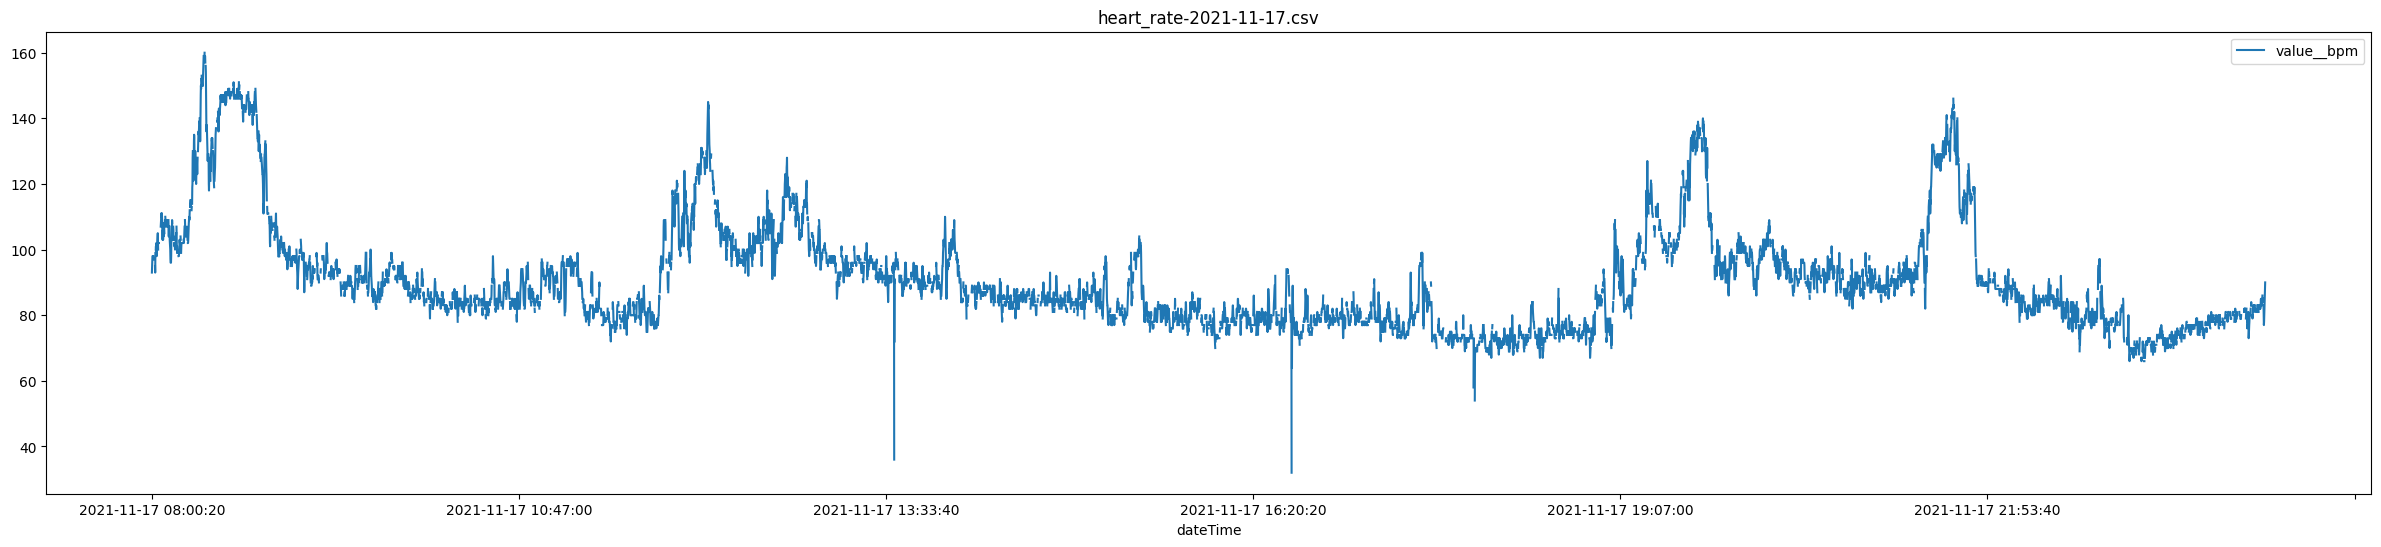

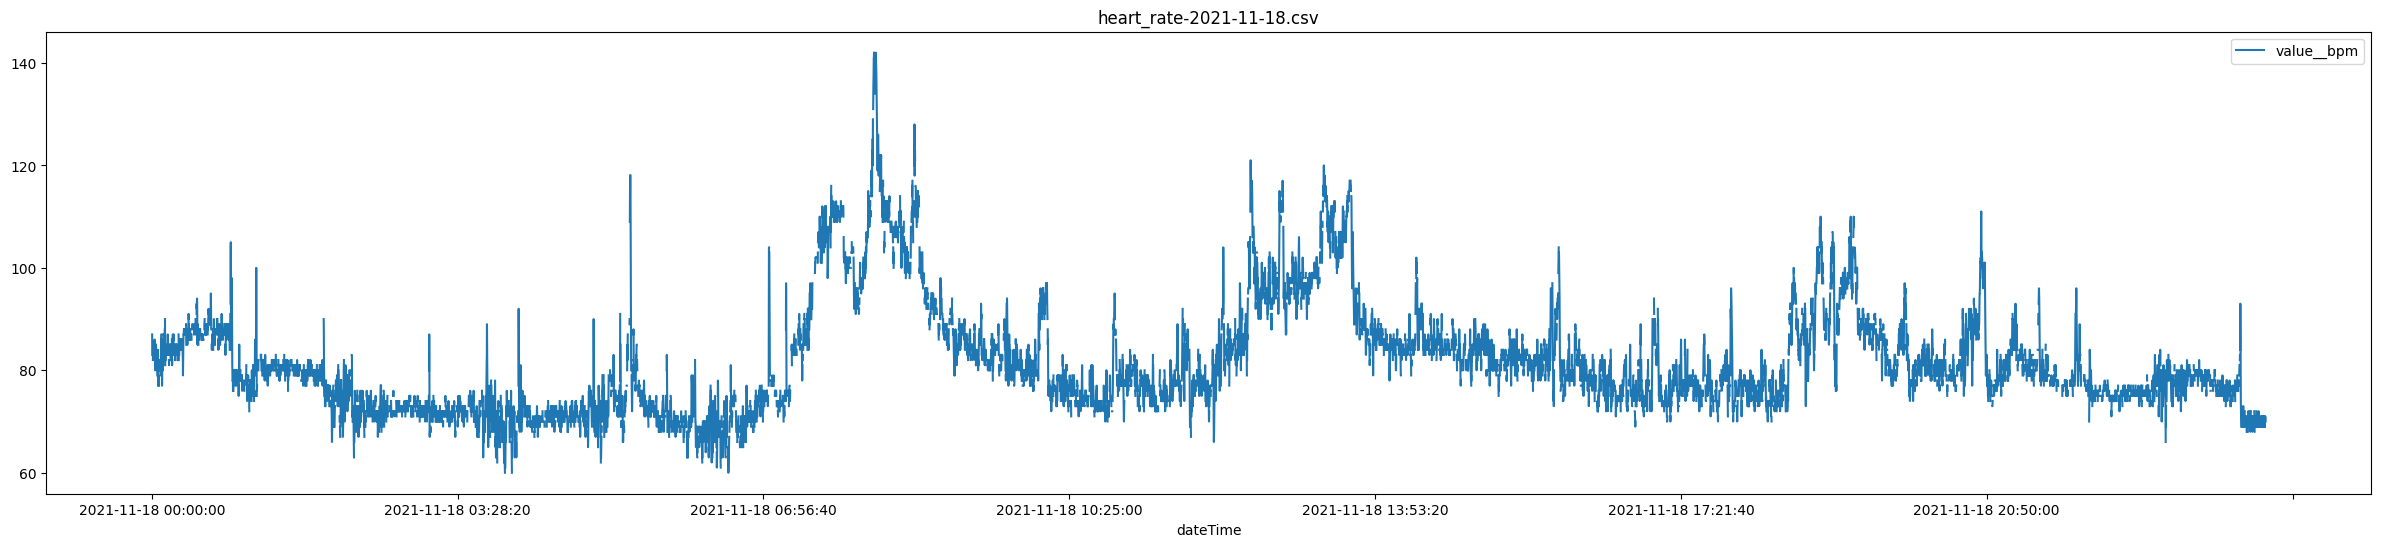

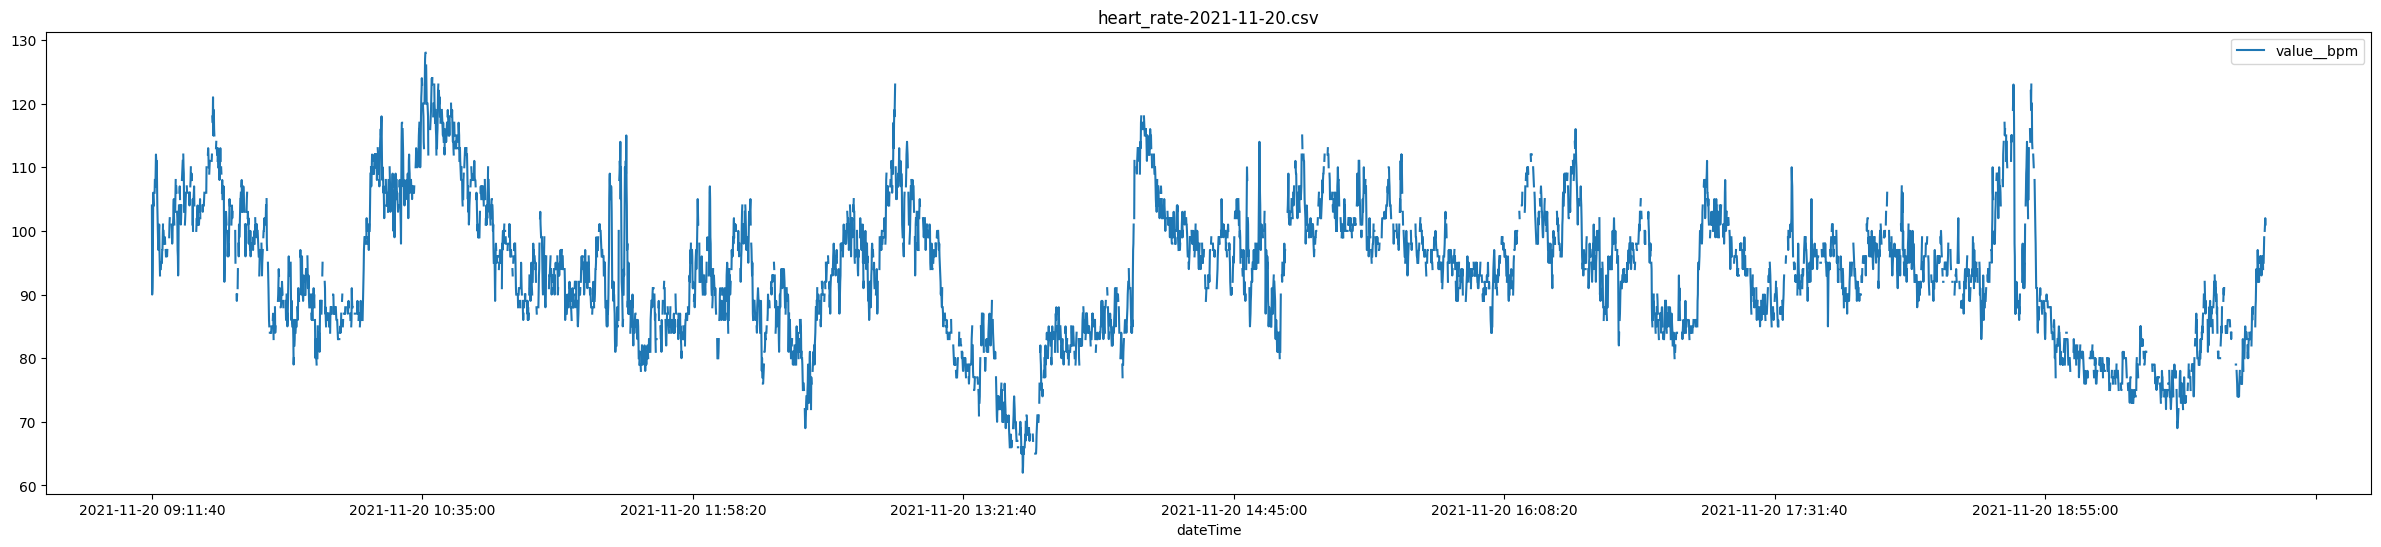

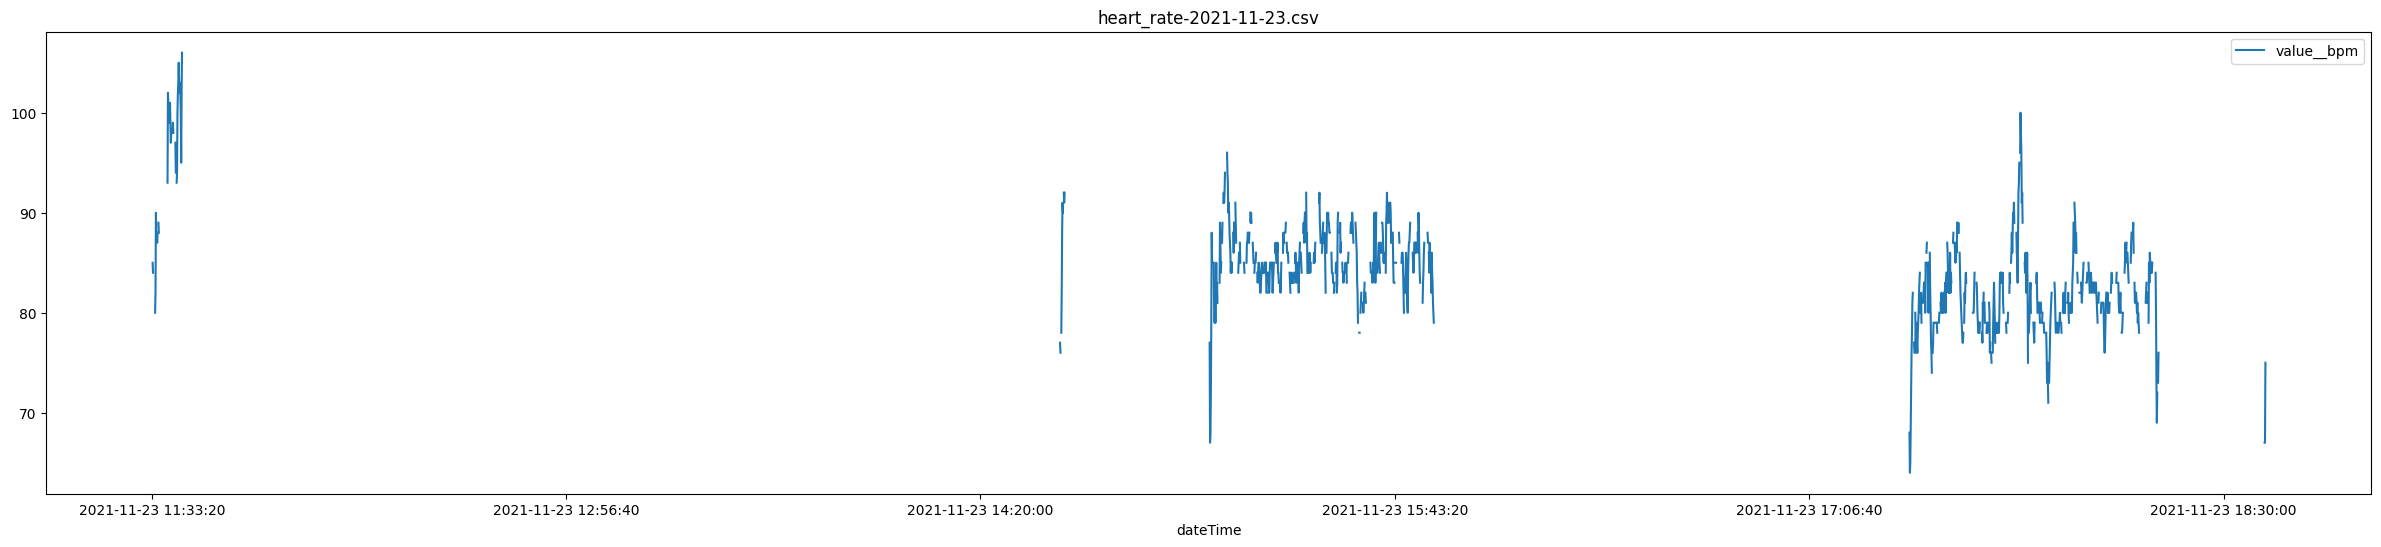

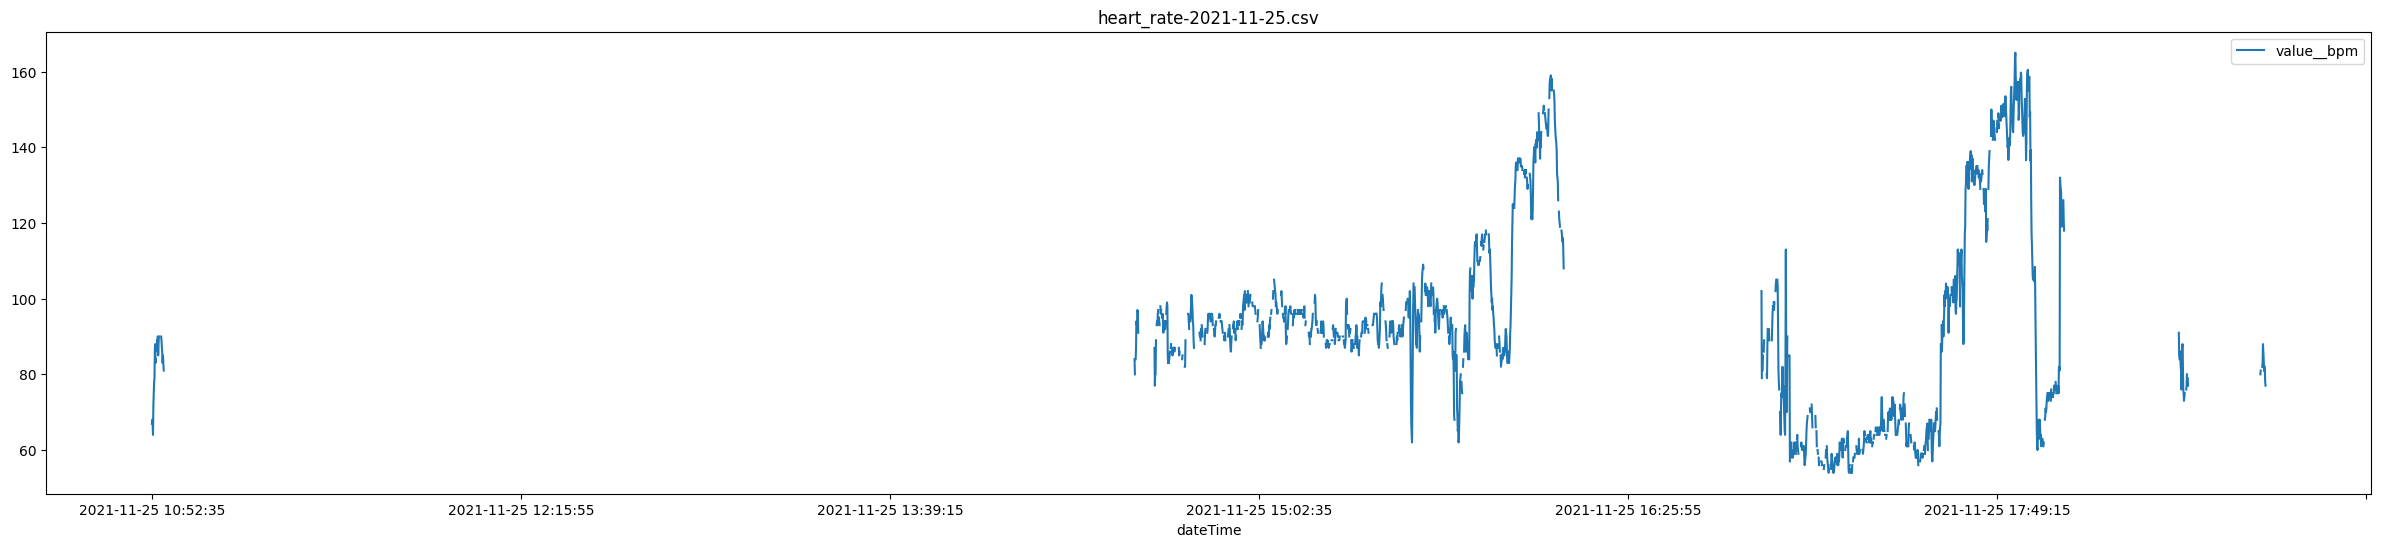

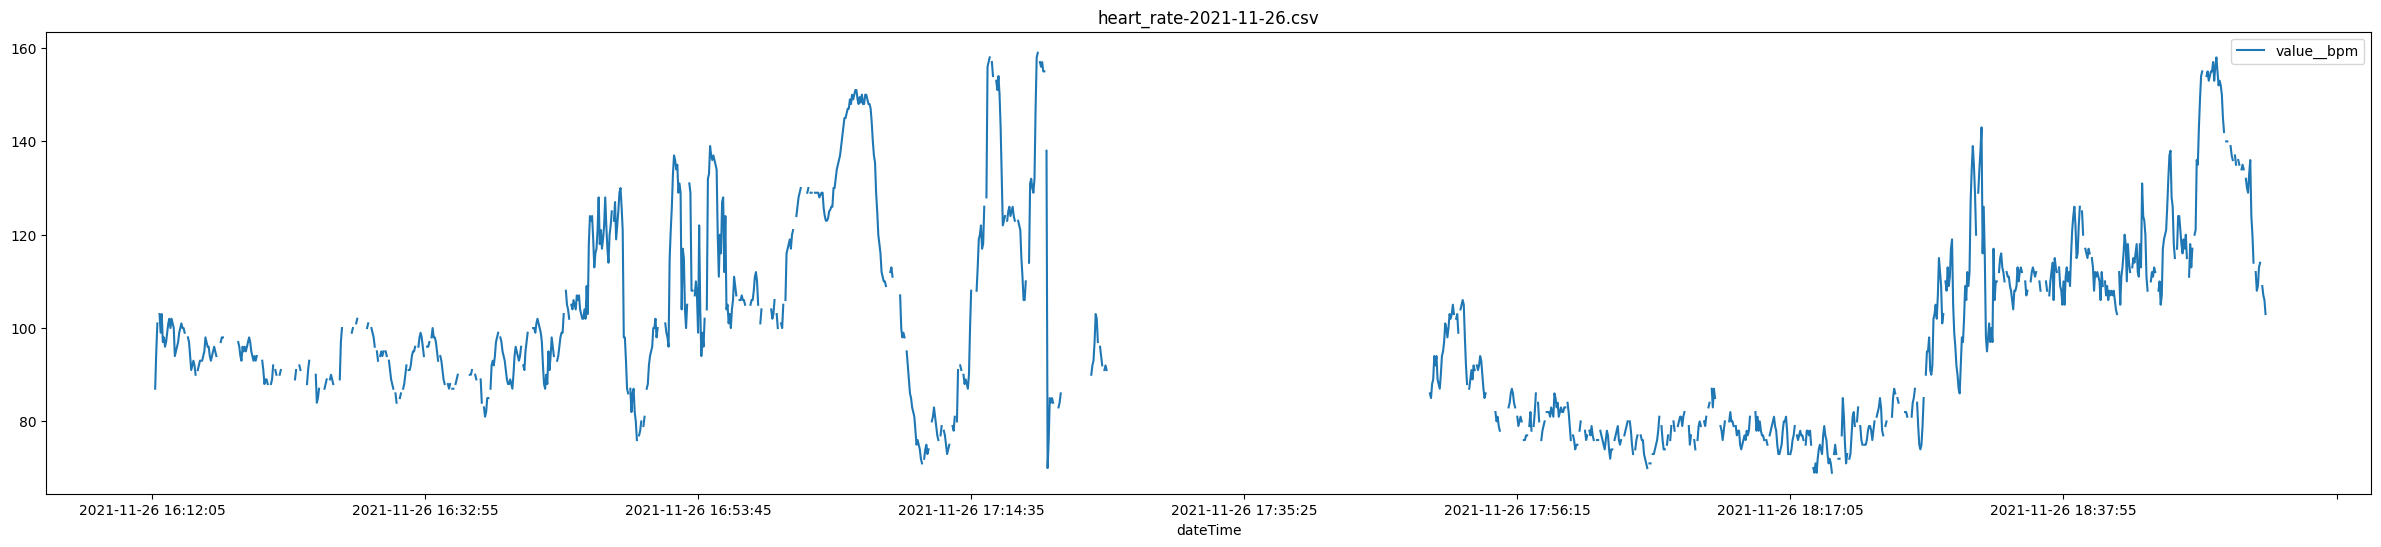

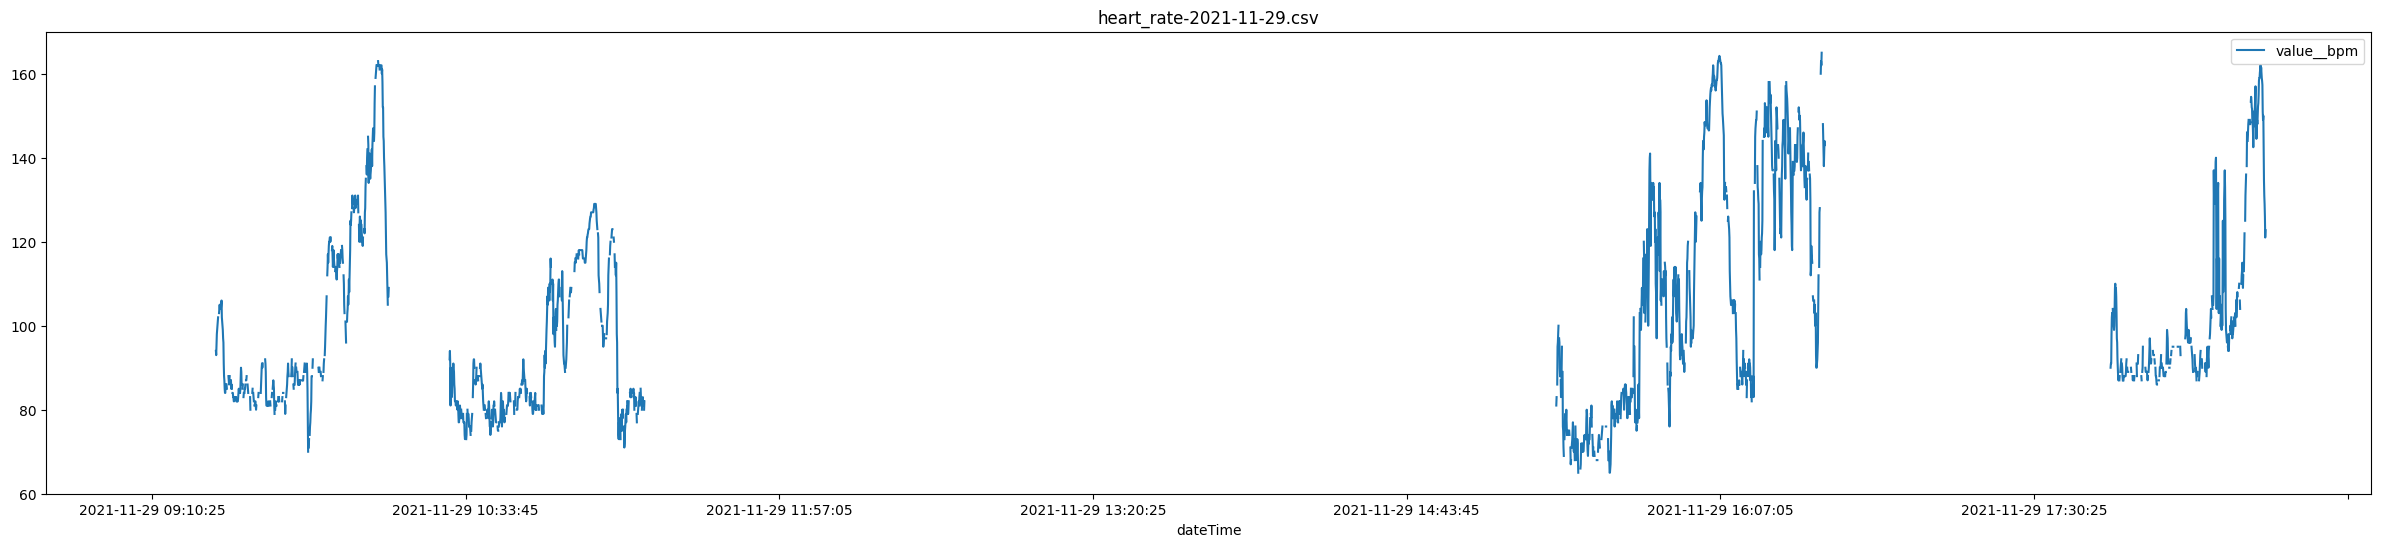

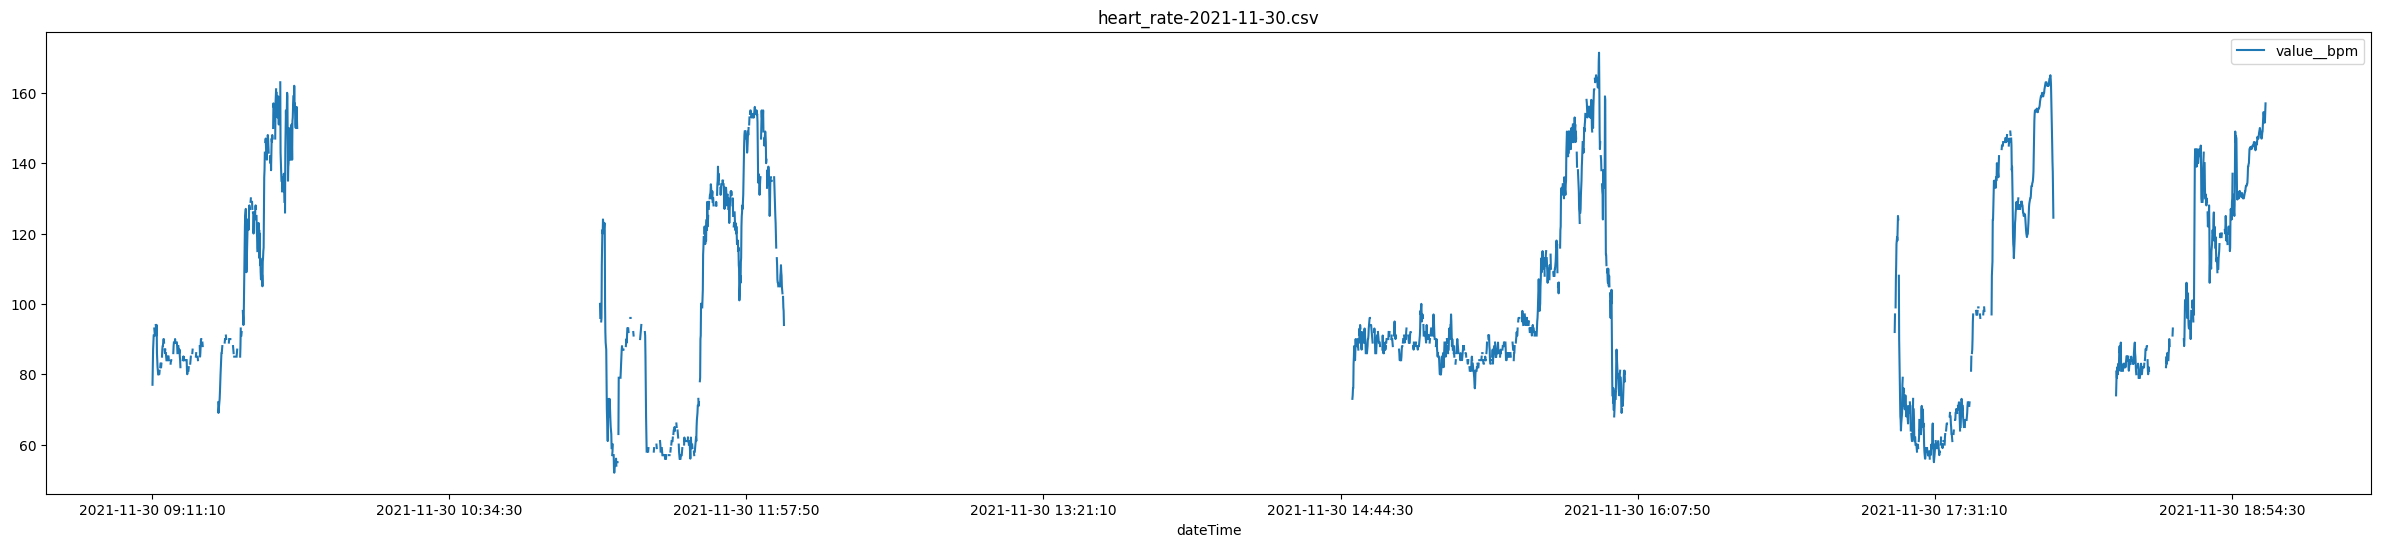

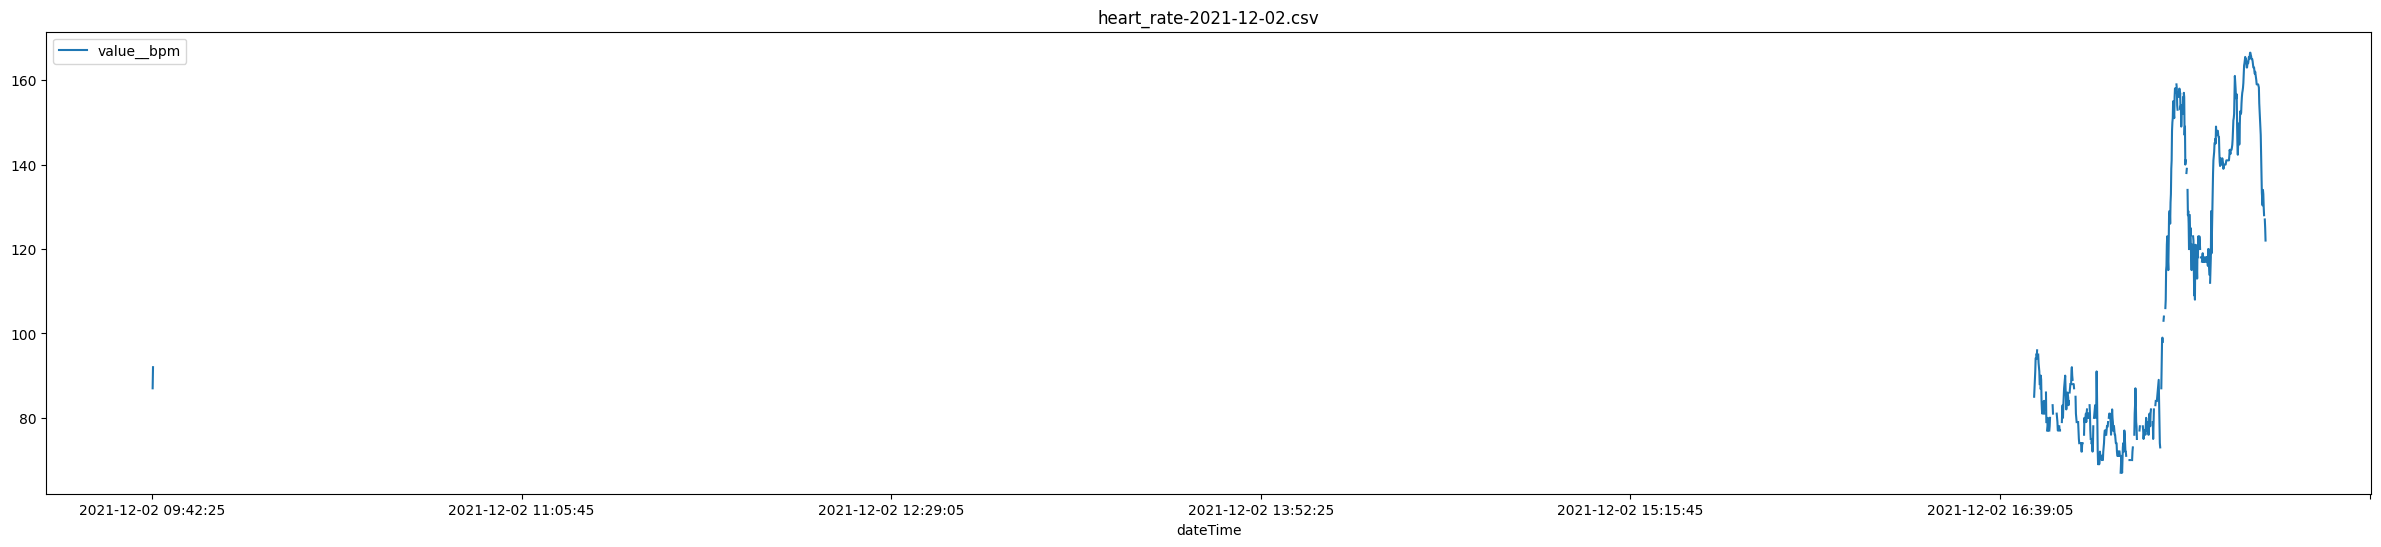

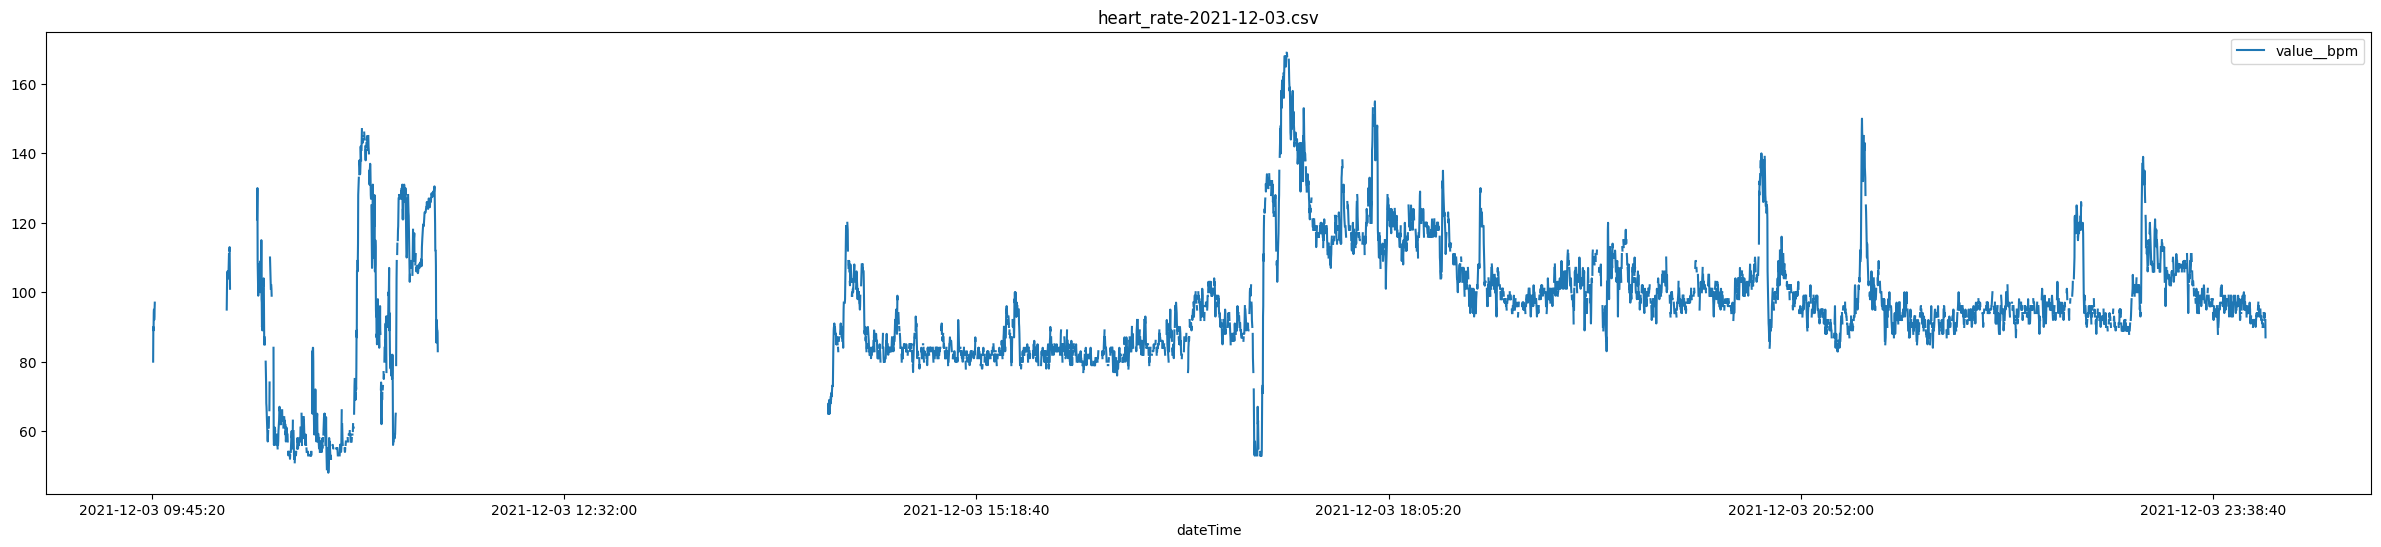

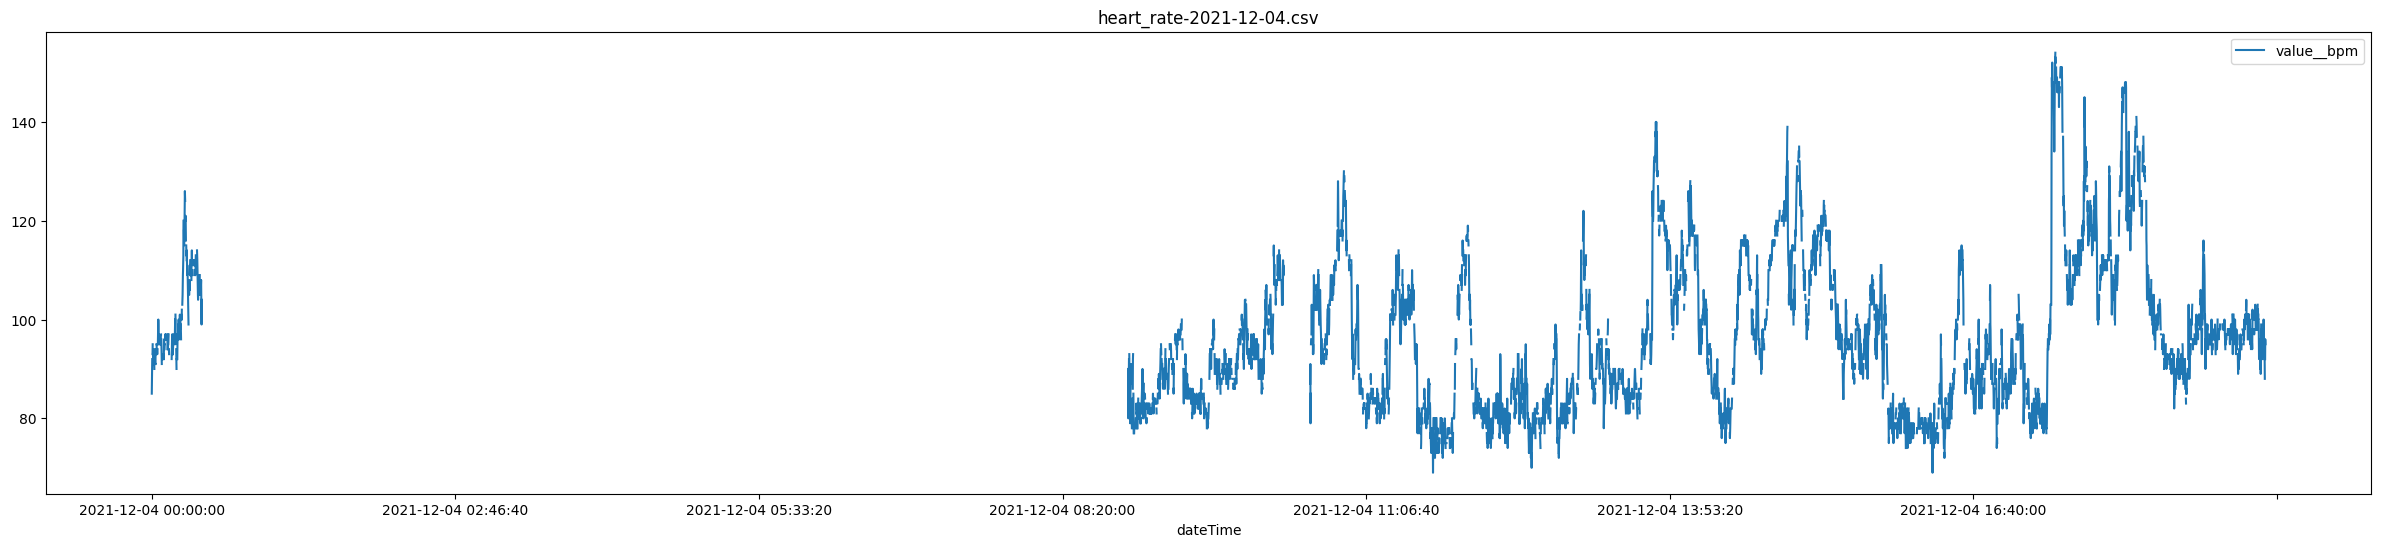

In [10]:
directory_path = '/content/gdrive/MyDrive/average_data_5S'

# Get a list of all the filenames in the directory
file_names = os.listdir(directory_path)

# Iterate over the list of filenames
for file_name in file_names:
    # Check if the file is a regular file
    if os.path.isfile(os.path.join(directory_path, file_name)):
        # Get the full file path
        file_path = os.path.join(directory_path, file_name)
        df = pd.read_csv(file_path)
        df.columns = ['dateTime', 'value__bpm','value__confidence']
        df.plot(kind='line', x='dateTime', y='value__bpm', title= str(file_name), figsize=(30, 6))
        plt.show()

### Make all the data of each day lie from 00:00:00 to 23:59:59

In [67]:
import os
import pandas as pd

# Specify the directory path
directory_path = '/content/gdrive/MyDrive/average_data_5S'

# Get a list of all the filenames in the directory
file_names = os.listdir(directory_path)

# Create a new directory called 'average_data' if it doesn't exist
average_data_directory = '/content/gdrive/MyDrive/average_data_5S_new'
# if not os.path.exists(average_data_directory):
#     os.makedirs(average_data_directory)

# Define the start and end times for the time range
start_time = pd.Timestamp('2021-11-18 00:00:00')
end_time = pd.Timestamp('2021-11-18 23:59:59')

file_name = 'heart_rate-2021-11-18.csv'
df = pd.read_csv(os.path.join(directory_path, file_name))

df['dateTime'] = pd.to_datetime(df['dateTime'])

df.set_index('dateTime', inplace=True)

df = df.reindex(pd.date_range(start=start_time, end=end_time, freq='5S'))

average_data_per_5_seconds = df.resample('5S').mean()

new_file_path = os.path.join(average_data_directory, file_name)
average_data_per_5_seconds.to_csv(new_file_path)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/gdrive/MyDrive/average_data_5S_new/heart_rate-2021-11-25.csv')
table_titles = df.columns

print("Table Titles:")
for title in table_titles:
    print(title)
df.columns = ['dateTime', 'value__bpm','value__confidence']  # Assign column names
df['value__bpm'] = pd.to_numeric(df['value__bpm'], errors='coerce')  # Convert the 'value__bpm' column to numeric values
df.plot(kind='line', x='dateTime', y='value__bpm', title=file_name, figsize=(20, 6))  # Plot the data
plt.show()  # Show the plot

Table Titles:
Unnamed: 0
value__bpm
value__confidence


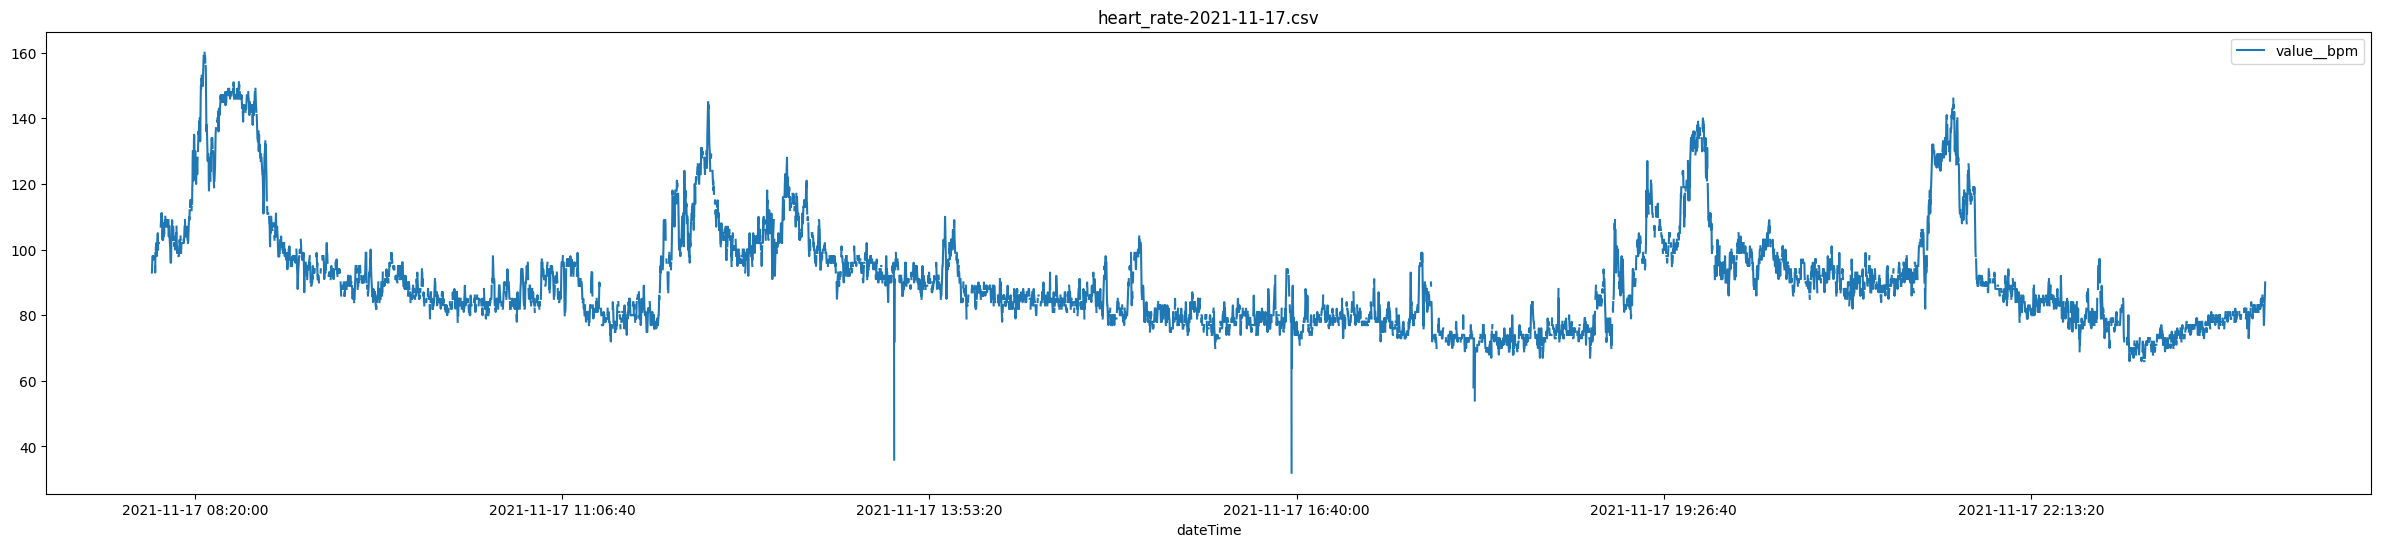

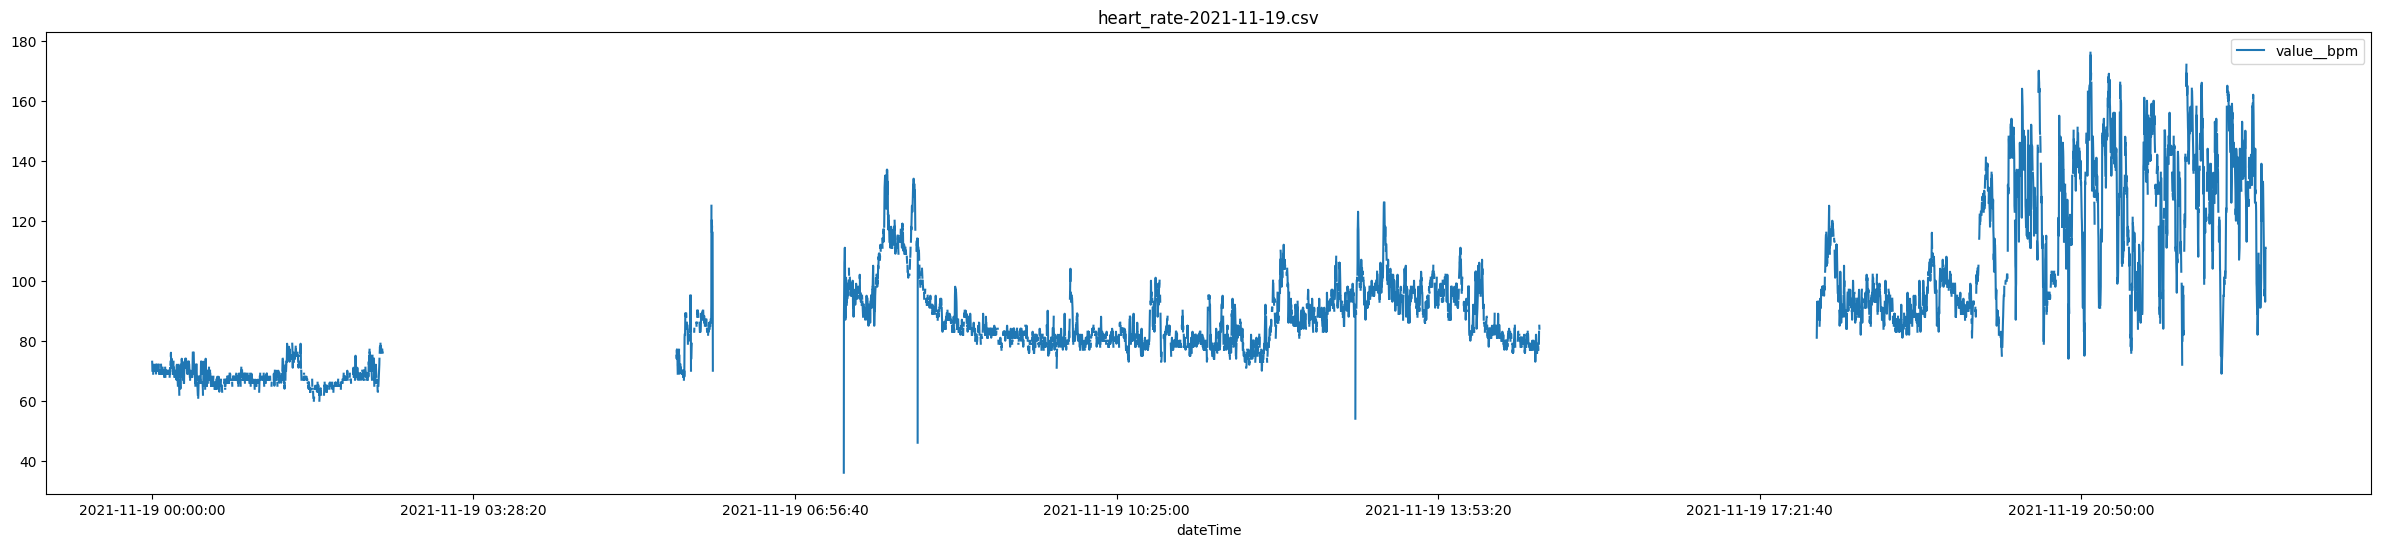

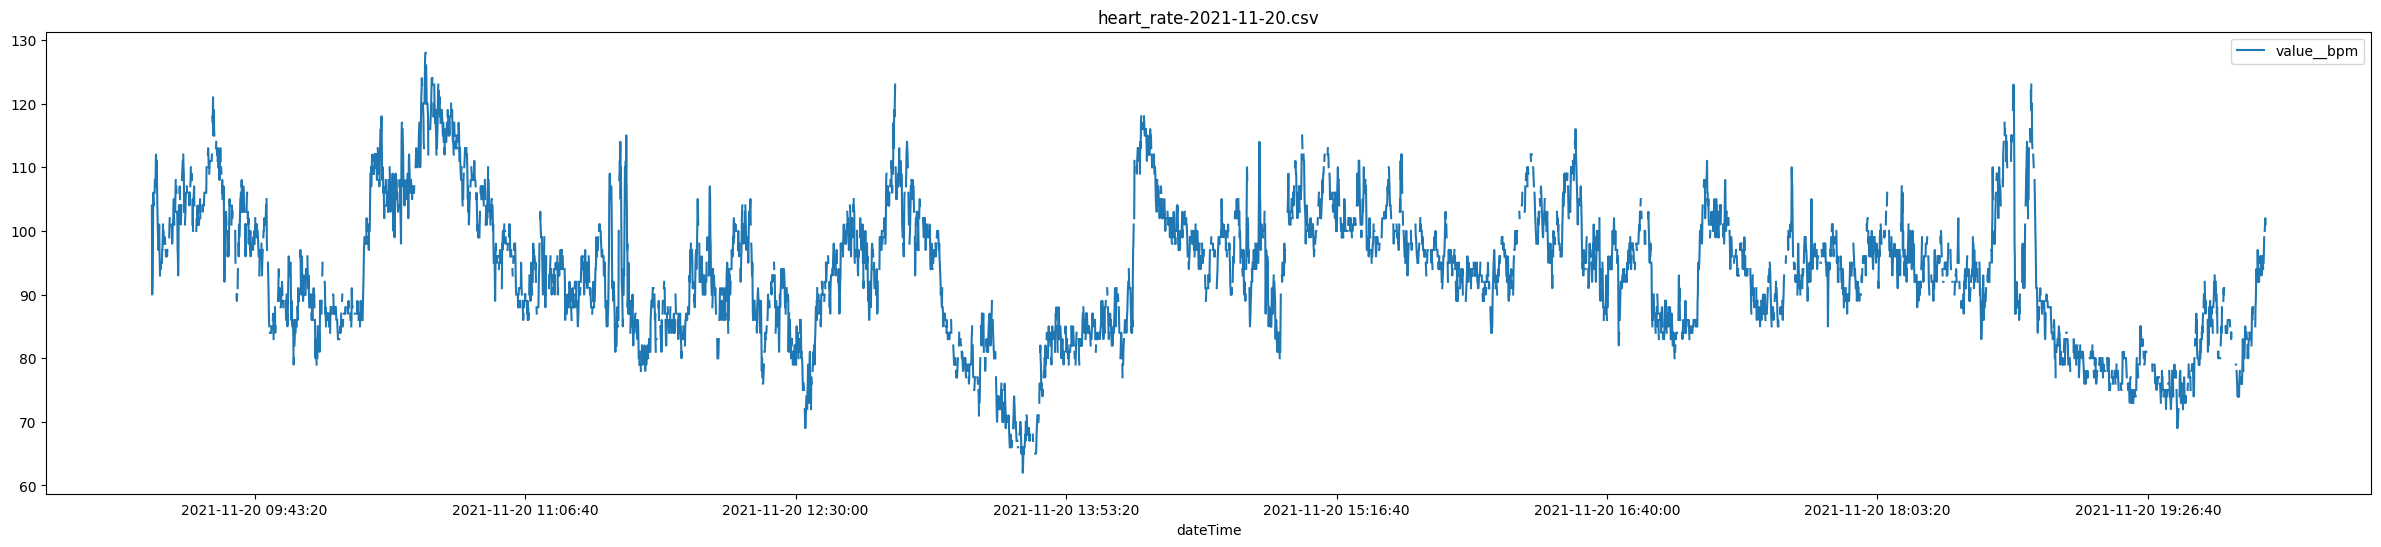

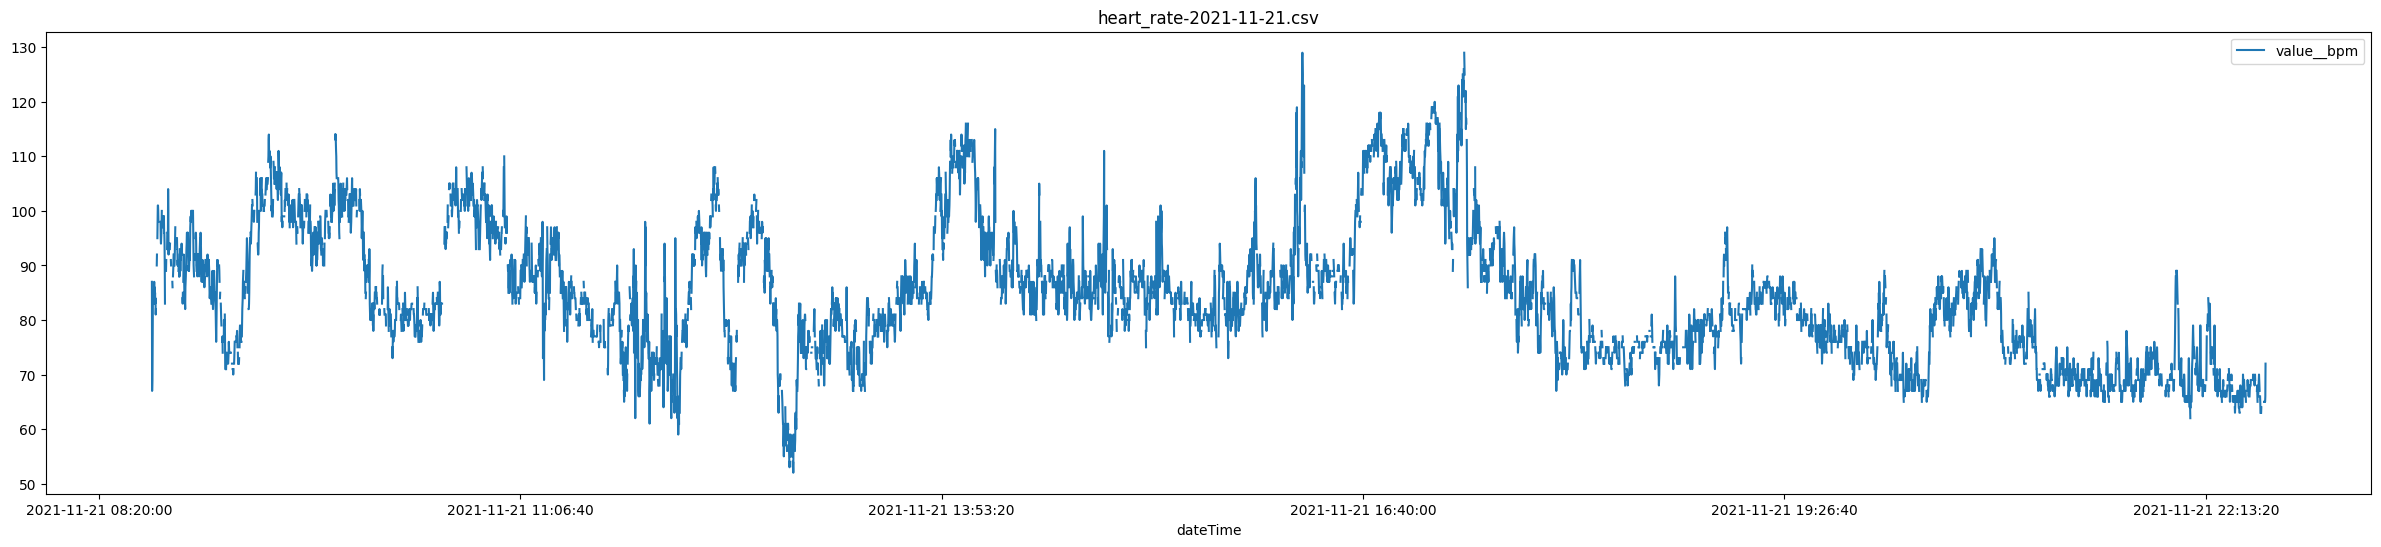

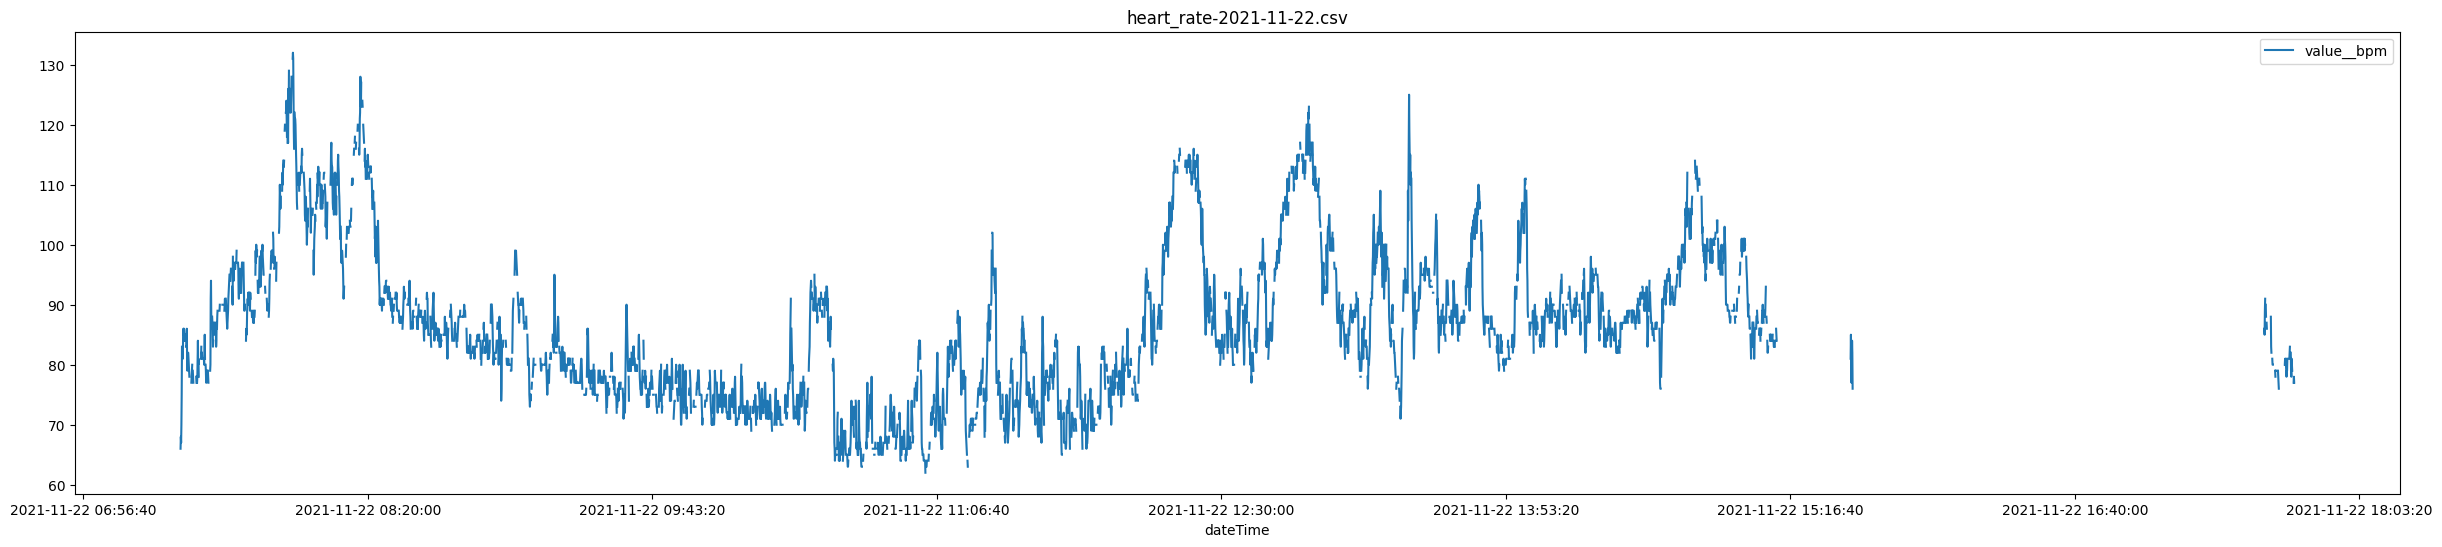

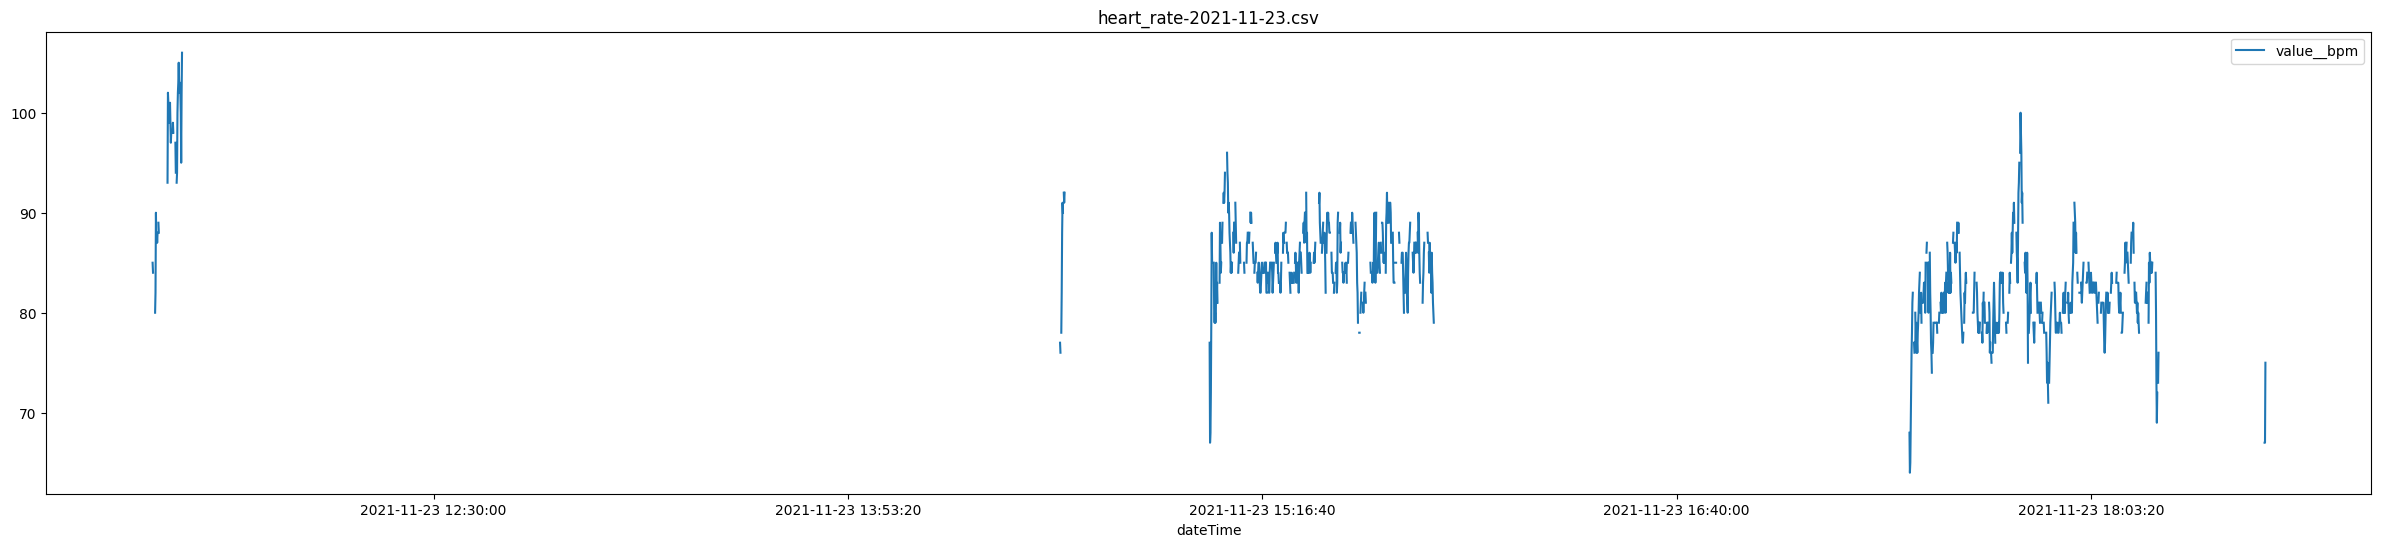

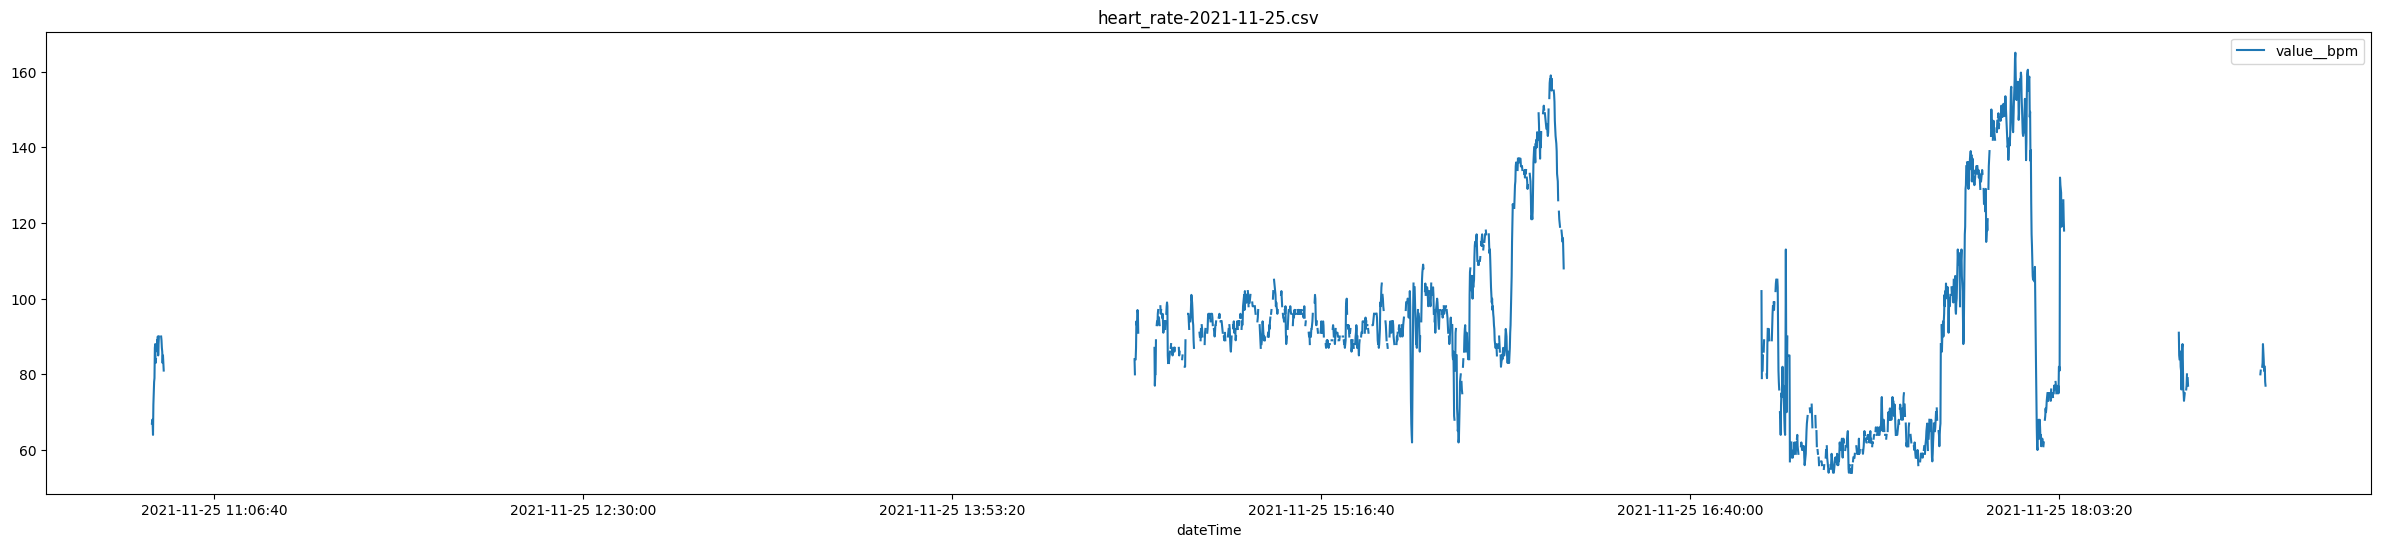

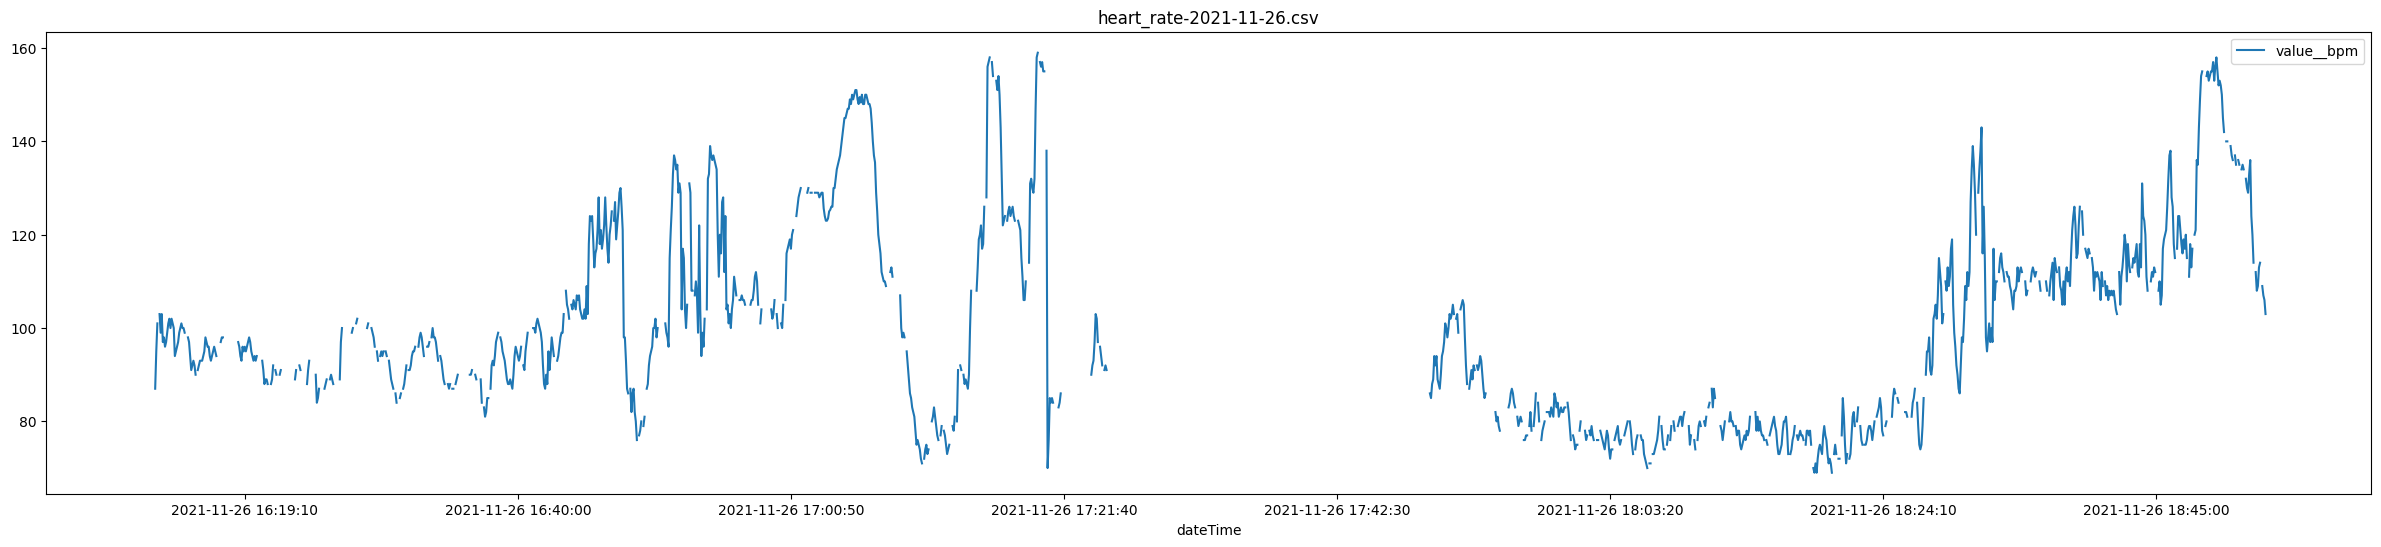

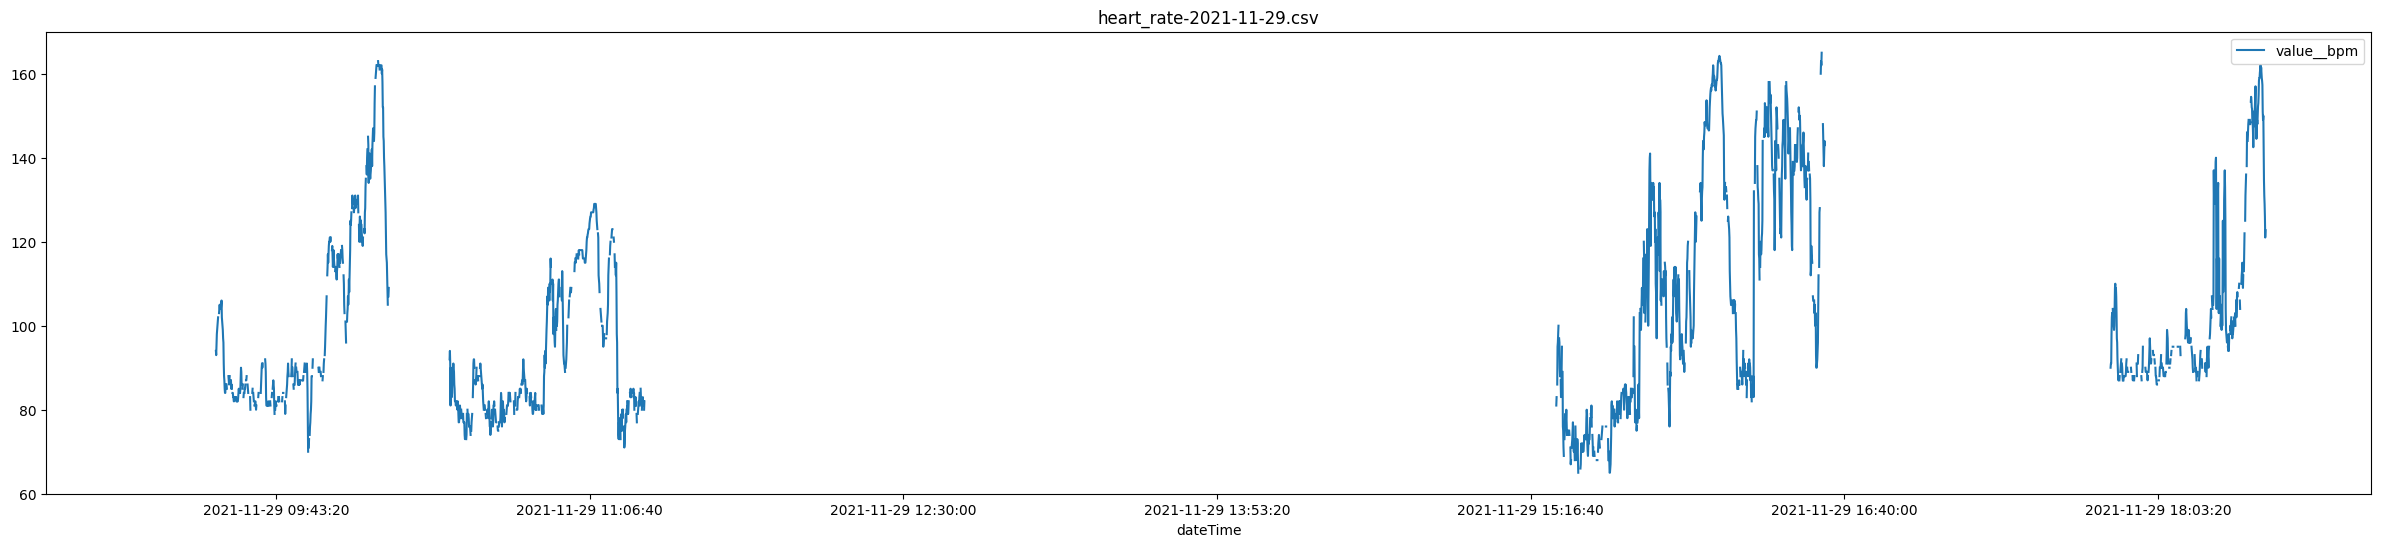

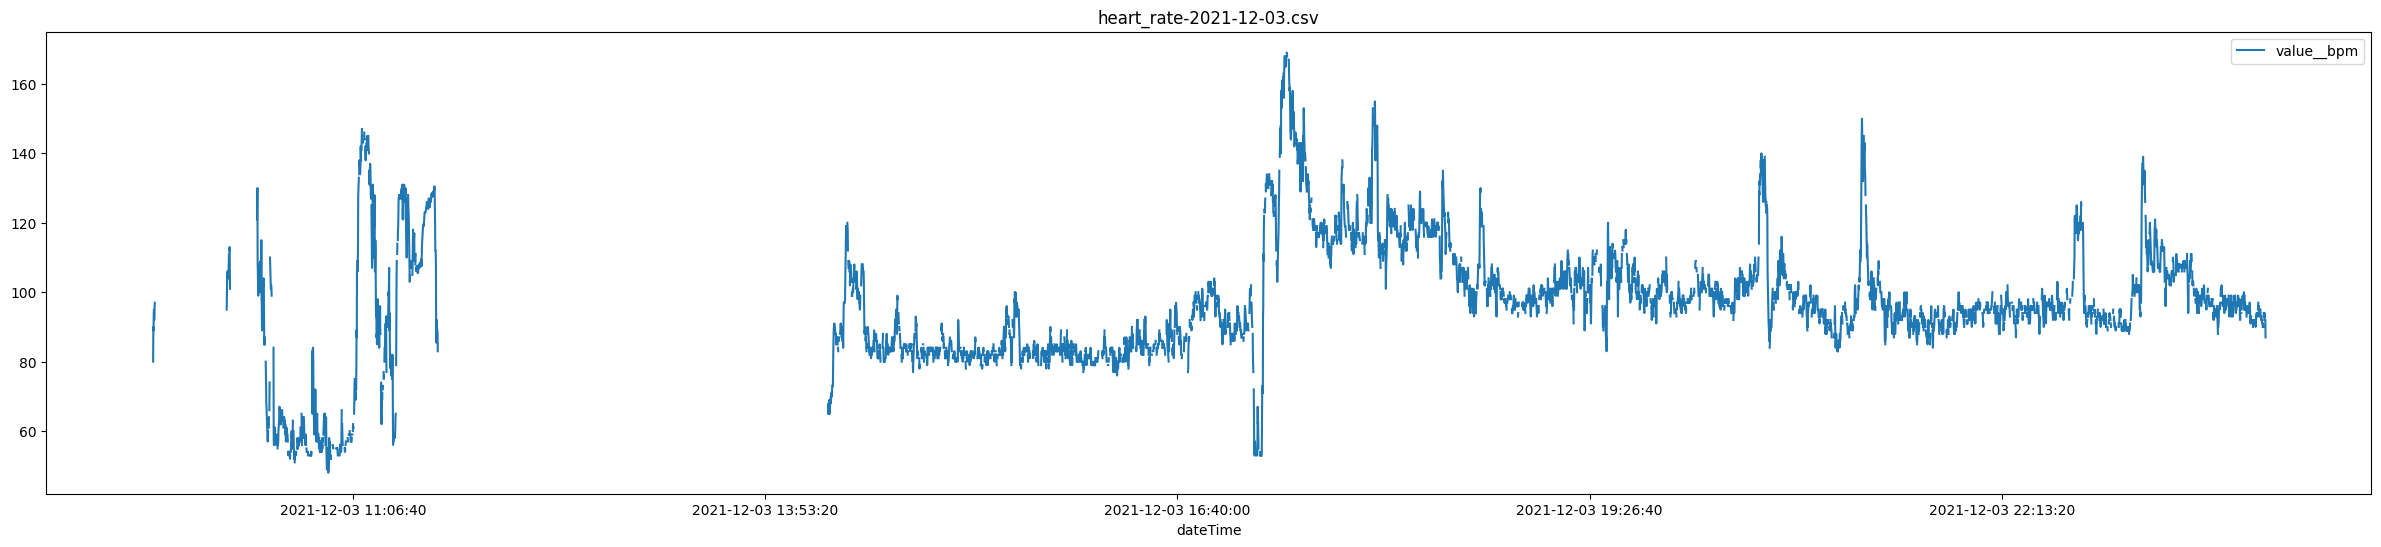

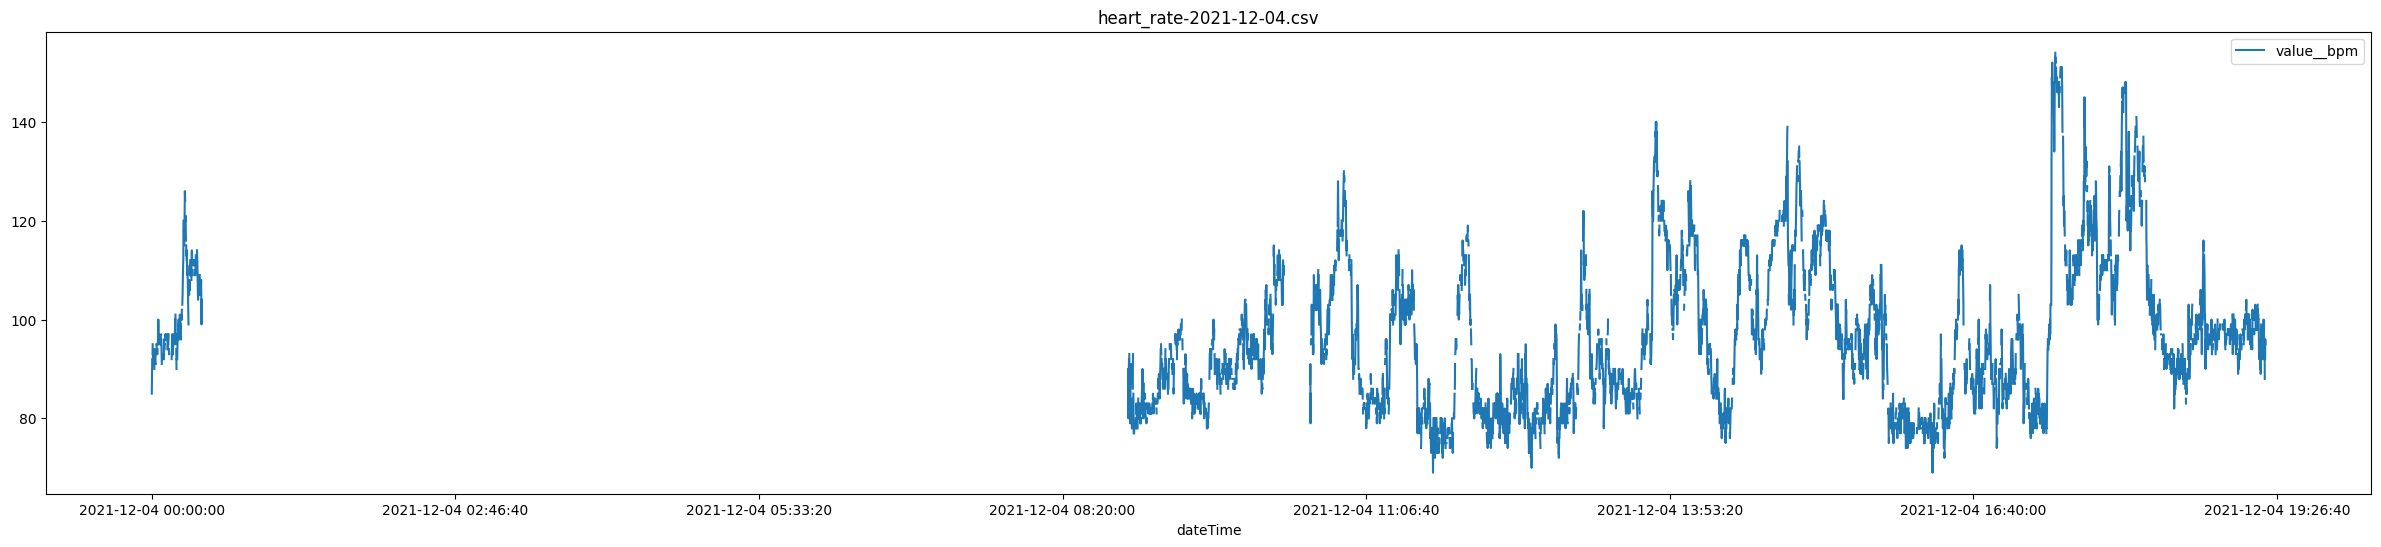

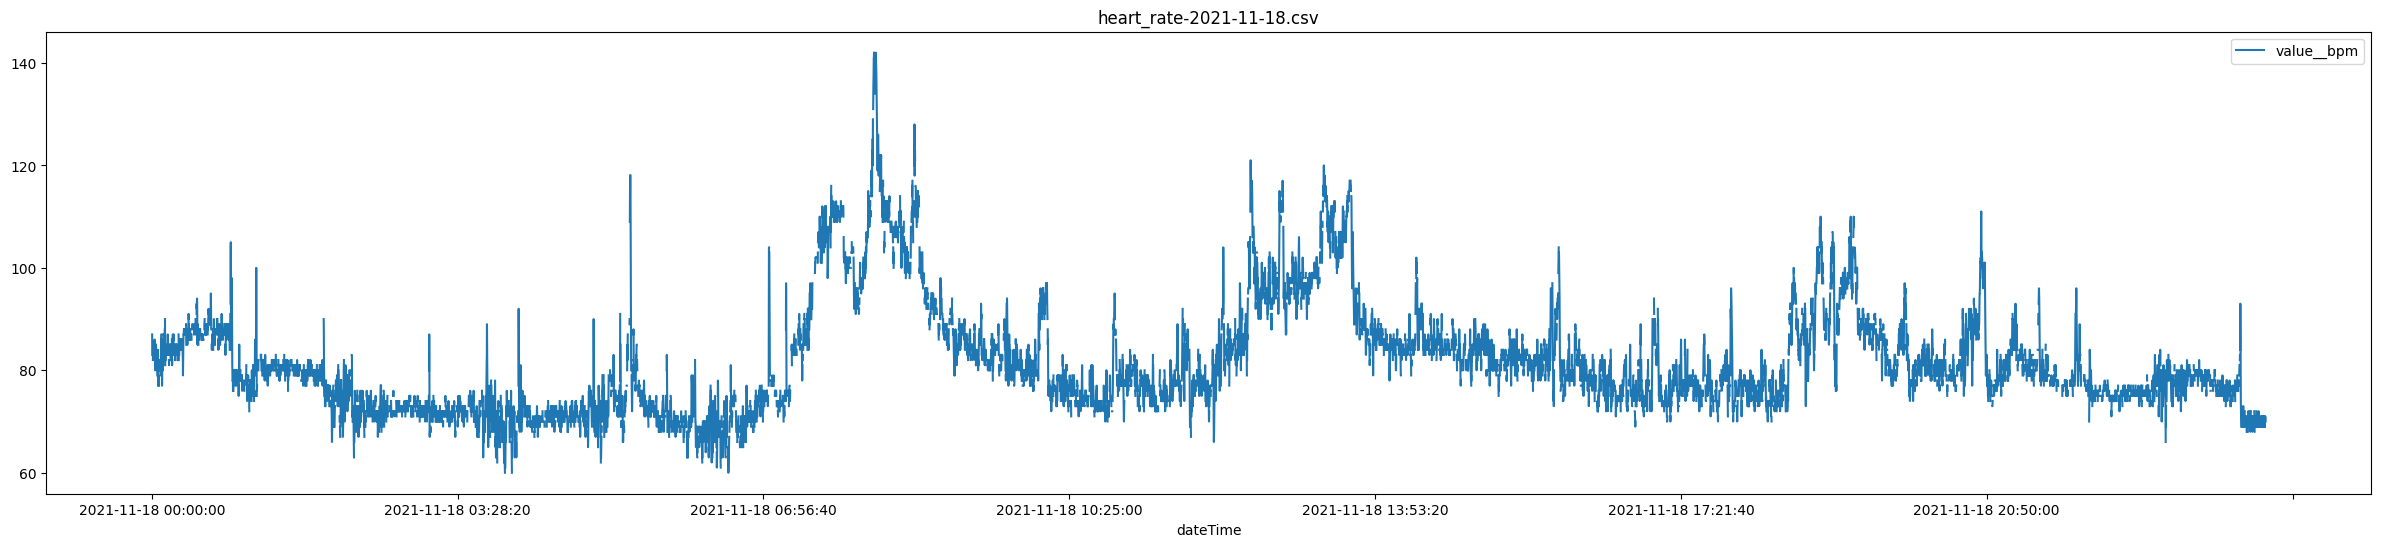

In [9]:
directory_path = '/content/gdrive/MyDrive/average_data_5S_new'

# Get a list of all the filenames in the directory
file_names = os.listdir(directory_path)

# Iterate over the list of filenames
for file_name in file_names:
    # Check if the file is a regular file
    if os.path.isfile(os.path.join(directory_path, file_name)):
        # Get the full file path
        file_path = os.path.join(directory_path, file_name)
        df = pd.read_csv(file_path)
        df.columns = ['dateTime', 'value__bpm','value__confidence']
        df.plot(kind='line', x='dateTime', y='value__bpm', title= str(file_name), figsize=(30, 6))
        plt.show()

#Imputing missing values using XGBoost

<ipython-input-7-2b1176849778>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values.fillna(-9999, inplace=True)
<ipython-input-7-2b1176849778>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values[columns_with_missing_values] = predicted_values


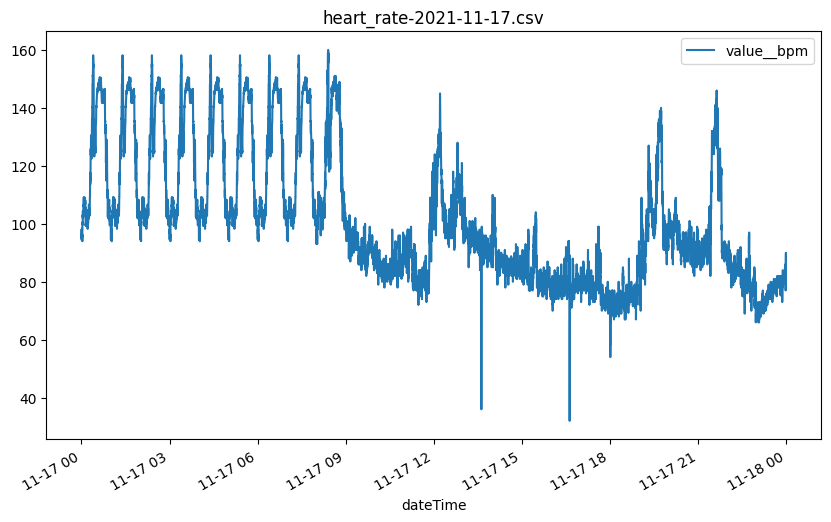

<ipython-input-7-2b1176849778>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values.fillna(-9999, inplace=True)
<ipython-input-7-2b1176849778>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values[columns_with_missing_values] = predicted_values


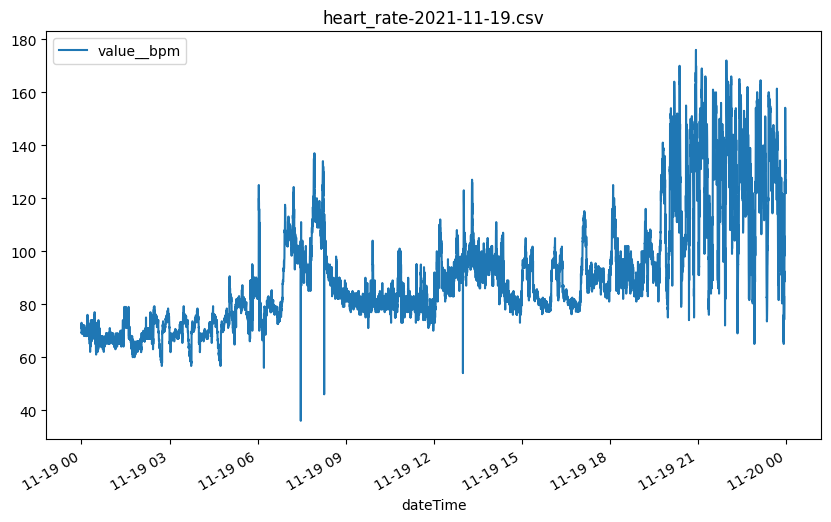

<ipython-input-7-2b1176849778>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values.fillna(-9999, inplace=True)
<ipython-input-7-2b1176849778>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values[columns_with_missing_values] = predicted_values


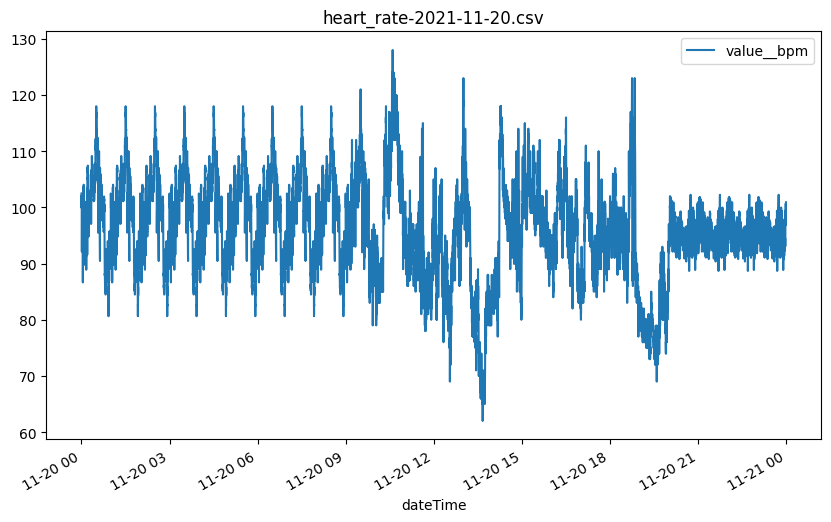

<ipython-input-7-2b1176849778>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values.fillna(-9999, inplace=True)
<ipython-input-7-2b1176849778>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values[columns_with_missing_values] = predicted_values


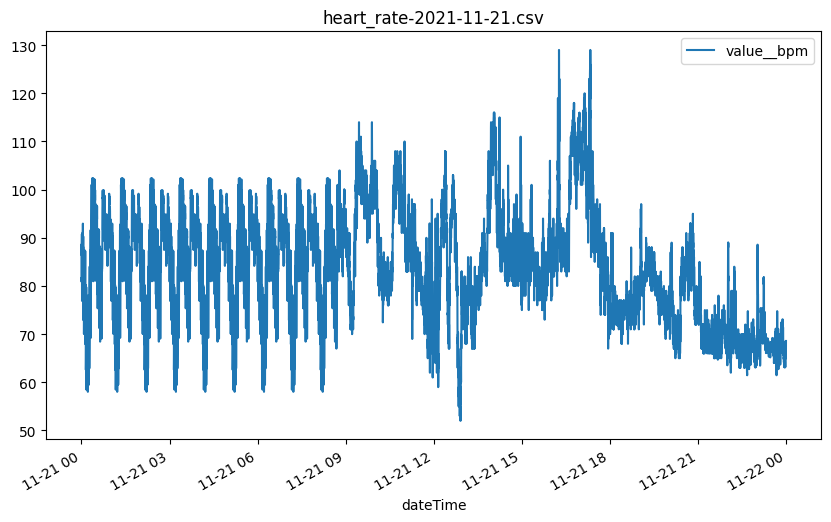

<ipython-input-7-2b1176849778>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values.fillna(-9999, inplace=True)
<ipython-input-7-2b1176849778>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values[columns_with_missing_values] = predicted_values


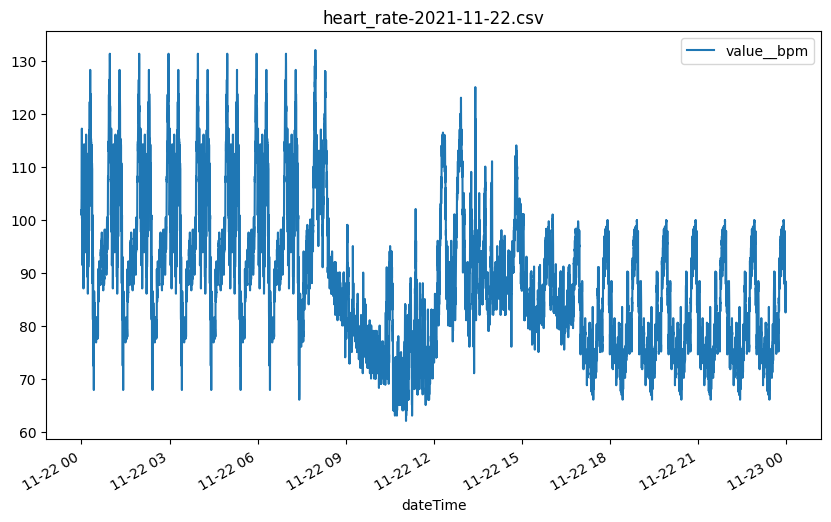

<ipython-input-7-2b1176849778>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values.fillna(-9999, inplace=True)
<ipython-input-7-2b1176849778>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values[columns_with_missing_values] = predicted_values


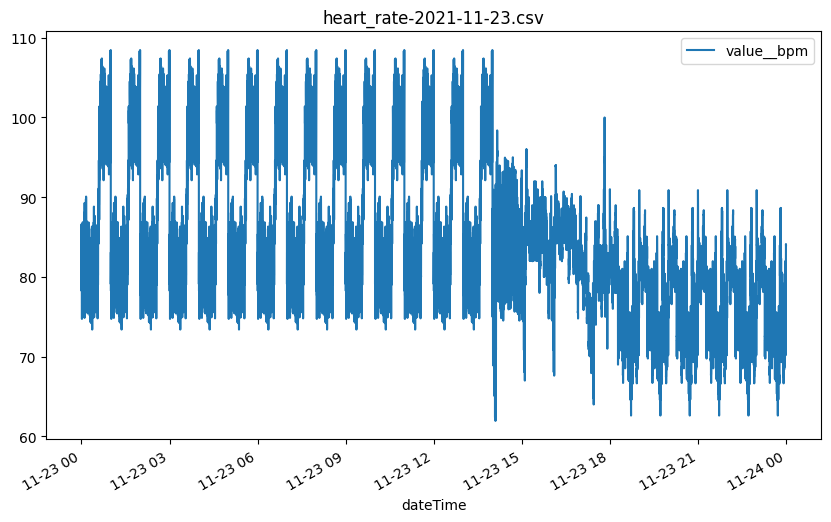

<ipython-input-7-2b1176849778>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values.fillna(-9999, inplace=True)
<ipython-input-7-2b1176849778>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values[columns_with_missing_values] = predicted_values


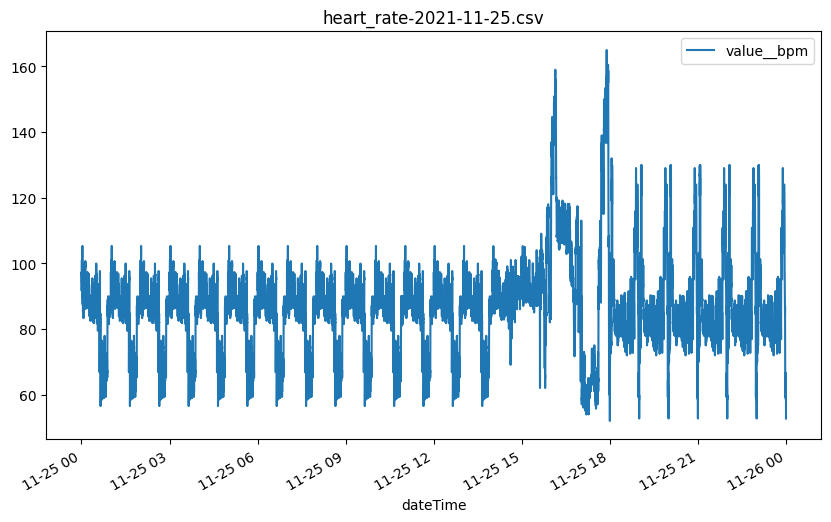

<ipython-input-7-2b1176849778>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values.fillna(-9999, inplace=True)
<ipython-input-7-2b1176849778>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values[columns_with_missing_values] = predicted_values


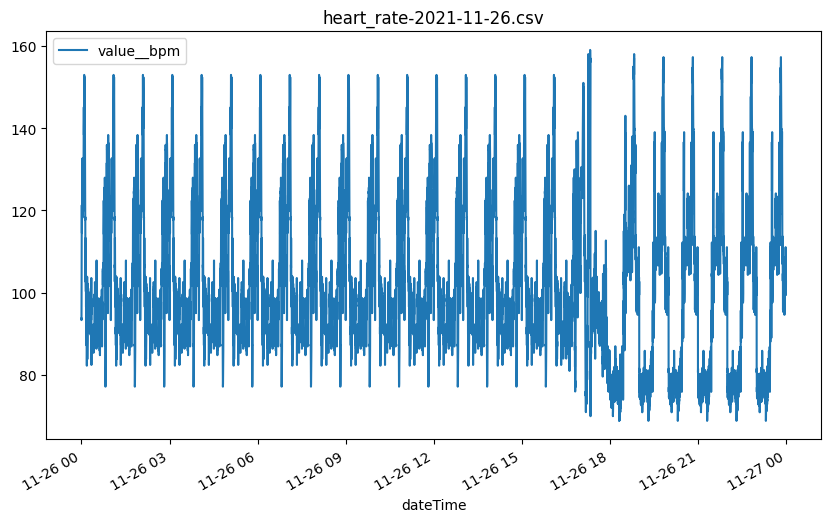

<ipython-input-7-2b1176849778>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values.fillna(-9999, inplace=True)
<ipython-input-7-2b1176849778>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values[columns_with_missing_values] = predicted_values


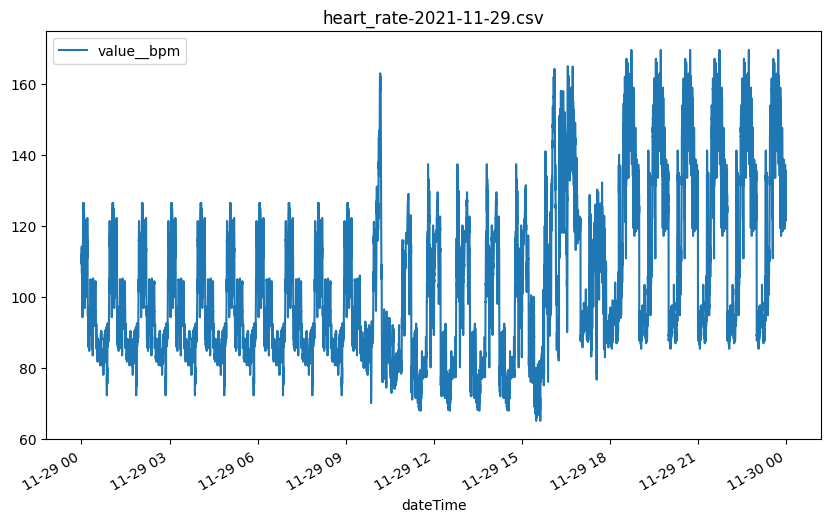

<ipython-input-7-2b1176849778>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values.fillna(-9999, inplace=True)
<ipython-input-7-2b1176849778>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values[columns_with_missing_values] = predicted_values


<ipython-input-7-2b1176849778>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values.fillna(-9999, inplace=True)
<ipython-input-7-2b1176849778>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values[columns_with_missing_values] = predicted_values


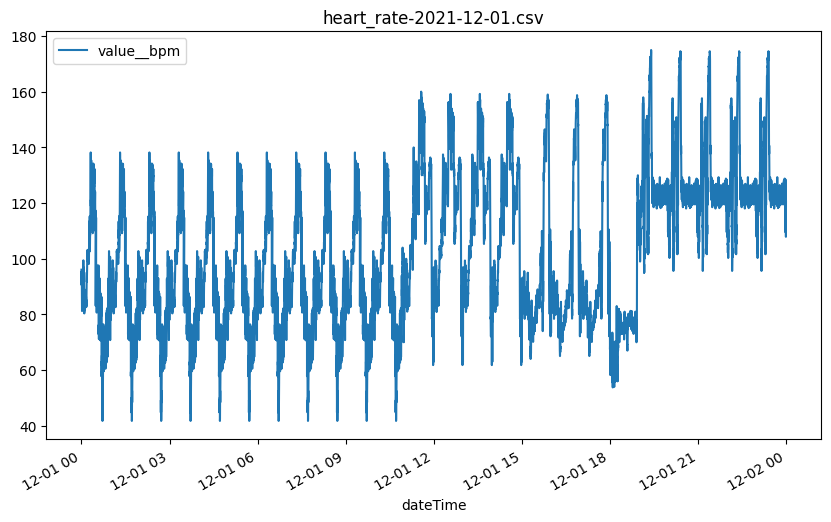

<ipython-input-7-2b1176849778>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values.fillna(-9999, inplace=True)
<ipython-input-7-2b1176849778>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values[columns_with_missing_values] = predicted_values


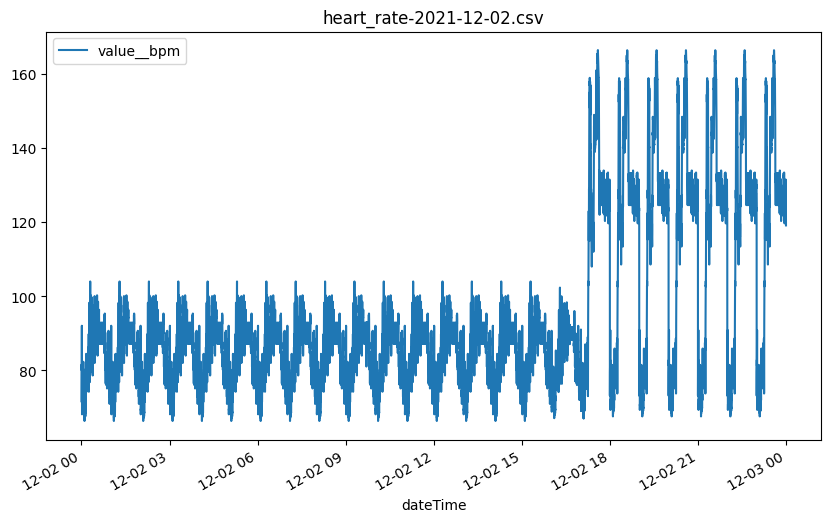

<ipython-input-7-2b1176849778>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values.fillna(-9999, inplace=True)
<ipython-input-7-2b1176849778>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values[columns_with_missing_values] = predicted_values


<ipython-input-7-2b1176849778>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values.fillna(-9999, inplace=True)
<ipython-input-7-2b1176849778>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values[columns_with_missing_values] = predicted_values


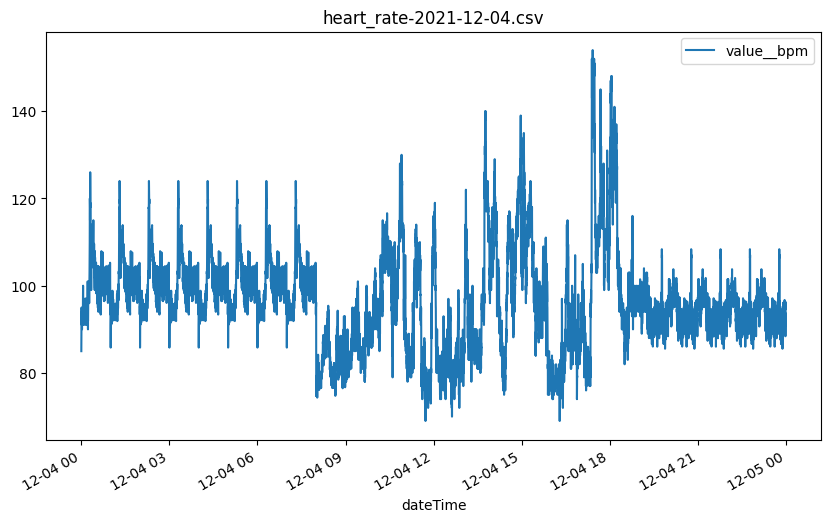

<ipython-input-7-2b1176849778>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values.fillna(-9999, inplace=True)
<ipython-input-7-2b1176849778>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing_values[columns_with_missing_values] = predicted_values


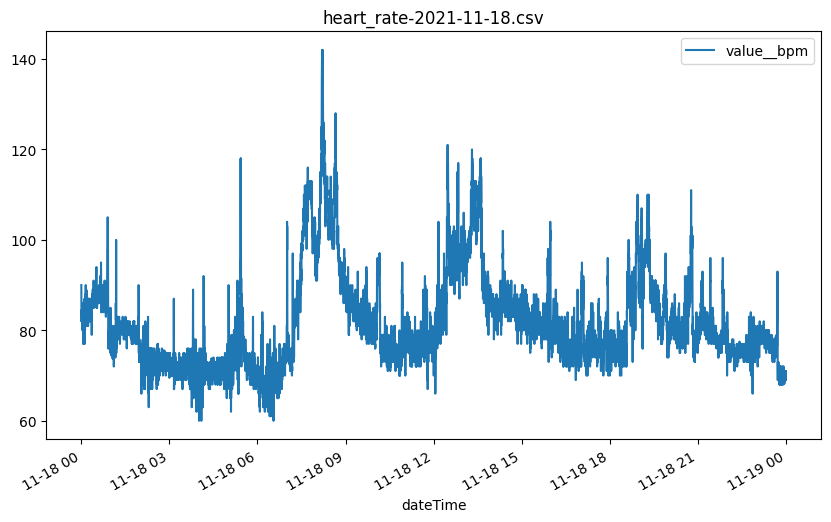

In [7]:
directory_path = '/content/gdrive/MyDrive/average_data_5S_new'
file_names = os.listdir(directory_path)

# Create a new directory called 'average_data' if it doesn't exist
average_data_directory = '/content/gdrive/MyDrive/average_data_5S_imputed'
if not os.path.exists(average_data_directory):
    os.makedirs(average_data_directory)

for file_name in file_names:
    if os.path.isfile(os.path.join(directory_path, file_name)):
        file_path = os.path.join(directory_path, file_name)

        df = pd.read_csv(file_path)

        df.columns = ['dateTime', 'value__bpm','value__confidence']
        df['dateTime'] = pd.to_datetime(df['dateTime'])


        df['year'] = df['dateTime'].dt.year
        df['month'] = df['dateTime'].dt.month
        df['day'] = df['dateTime'].dt.day
        df['hour'] = df['dateTime'].dt.hour
        df['minute'] = df['dateTime'].dt.minute
        df['second'] = df['dateTime'].dt.second

        df.drop(columns=['dateTime'], inplace=True)

        columns_with_missing_values = df.columns[df.isnull().any()].tolist()

        # Split the dataset into two parts: one with missing values and one without missing values
        df_with_missing_values = df[df.isnull().any(axis=1)]
        df_without_missing_values = df.dropna()

        # Replace missing values with a placeholder value (e.g., -9999)
        df_with_missing_values.fillna(-9999, inplace=True)

        # Split the dataset into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(df_without_missing_values.drop(columns_with_missing_values, axis=1),
                                                            df_without_missing_values[columns_with_missing_values],
                                                            test_size=0.2, random_state=42)

        # Train an XGBoost model on the training set
        model = xgb.XGBRegressor()
        model.fit(X_train, y_train)

        # Predict missing values using the trained model
        predicted_values = model.predict(df_with_missing_values.drop(columns_with_missing_values, axis=1))

        # Replace missing values in the original dataset with the predicted values
        df_with_missing_values[columns_with_missing_values] = predicted_values

        # Combine the two parts of the dataset into a complete dataset with no missing values
        complete_dataset = pd.concat([df_with_missing_values, df_without_missing_values])
        complete_dataset['dateTime'] = pd.to_datetime(complete_dataset[['year', 'month', 'day', 'hour', 'minute', 'second']])

        new_file_path = os.path.join(average_data_directory, file_name)
        complete_dataset.to_csv(new_file_path)

        complete_dataset.plot(kind='line', x='dateTime', y='value__bpm', title= str(file_name), figsize=(10, 6))
        plt.show()